# Подгрузка библиотек

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import csv
import os
import numpy as np
import pandas as pd
from collections import Counter
import re

import seaborn as sns
from matplotlib import pyplot as plt
from tqdm import tqdm

import warnings

warnings.filterwarnings('ignore')

In [ ]:
df_path = './data/'

In [ ]:
tqdm.pandas(desc="Processing rows...", ncols=100)

# 1. Загрузка данных

Исходный набор представляет собой открытые данные [Государственного каталога музейного фонда РФ Министерства культуры РФ](https://opendata.mkrf.ru/opendata/7705851331-museum-exhibits)

In [ ]:
# Подгрузка данных
data = pd.read_csv(f'{df_path}/Russian_museum.csv', sep=';', encoding='utf-8')
data.head()

,Наименование предмета,Автор,Музей,Items,Дата создания предмета (строка),Место создания,Строковое описание размеров,Описание,Количество составляющих,Изображение,...,Длина,Единица измерения размера,Интервал времени создания предмета (начало),Интервал времени создания предмета (окончание),"Точность задания времени (день, месяц, год, век, эпоха).",URL предмета на сайте музея,Ключевые слова,Краткое описание истории бытования (провенанс) предмета,Идентификатор статуса предмета,Типология
0,Декоративный мотив.,"[""Малевич Казимир Северинович 1879-1935""]",Федеральное государственное бюджетное учрежден...,"[""бумага, тушь""]",1908,NaN,"Л.: 9 x 3,8 И.: 6,2 x 2,3",В вертикальной прямоугольной рамке декоративны...,1.0,"[{""url"":""http://goskatalog.ru/muzfo-imaginator...",...,NaN,NaN,1908-01-01T12:00:00.000Z,NaN,YEAR,NaN,NaN,NaN,6,графика
1,Женский портрет в шляпе с пером. На обороте: Н...,"[""Малевич Казимир Северинович (1879-1935)""]",Федеральное государственное бюджетное учрежден...,"[""бумага, графитный карандаш, растушевка""]",Конец 1900-х,NaN,"Л.: 18,5 x 16 И.: 12 x 12","Портрет женщины в шляпе с пером (фронтально, о...",1.0,"[{""url"":""http://goskatalog.ru/muzfo-imaginator...",...,NaN,NaN,1906-01-01T12:00:00.000Z,1909-01-01T12:00:00.000Z,YEAR,NaN,NaN,NaN,6,графика
2,Декоративные мотивы. Три виньетки,"[""Малевич Казимир Северинович (1879-1935)""]",Федеральное государственное бюджетное учрежден...,"[""бумага верже, тушь, перо""]",Ок. 1908 (?),NaN,"13,6 x 15,7 И.1: 11,5 х 9,7 И.2: 5,8 х 2,5 ...",Три виньетки. Слева: овальная виньетка с цвето...,1.0,"[{""url"":""http://goskatalog.ru/muzfo-imaginator...",...,NaN,NaN,1908-01-01T12:00:00.000Z,NaN,YEAR,NaN,NaN,NaN,6,графика
3,Два женских портрета.,"[""Малевич Казимир Северинович 1879-1935""]",Федеральное государственное бюджетное учрежден...,"[""бумага, черные чернила""]",Конец 1920-х - начало 1930-х,NaN,"20,7 x 13,7. (И.1: 7,8х7,8; И.2: 7,6х7,1)","Один под другим, в рамках: два женских портрет...",1.0,"[{""url"":""http://goskatalog.ru/muzfo-imaginator...",...,NaN,NaN,1926-01-01T12:00:00.000Z,1933-01-01T12:00:00.000Z,YEAR,NaN,NaN,NaN,6,графика
4,Женский портрет (погрудный).,"[""Малевич Казимир Северинович (1879-1935)""]",Федеральное государственное бюджетное учрежден...,"[""бумага, бумага цветная, тушь, гуашь, наклейка""]",Сер.-2-ая половина 1900-х (?),NaN,"Л.: 15,9 x 15,7; И.: 7,7 x 7,7",В круге: на фоне с цветочными узорами - поясн...,1.0,"[{""url"":""http://goskatalog.ru/muzfo-imaginator...",...,NaN,NaN,1903-01-01T12:00:00.000Z,1909-01-01T12:00:00.000Z,YEAR,NaN,NaN,NaN,6,графика


# 2. Очистка данных

In [ ]:
# Удаление дубликатов
data_cleaned = data.drop_duplicates()

# Сброс индексов после удаления дубликатов
data_cleaned = data_cleaned.reset_index(drop=True)

In [ ]:
data_cleaned

,Наименование предмета,Автор,Музей,Items,Дата создания предмета (строка),Место создания,Строковое описание размеров,Описание,Количество составляющих,Изображение,...,Длина,Единица измерения размера,Интервал времени создания предмета (начало),Интервал времени создания предмета (окончание),"Точность задания времени (день, месяц, год, век, эпоха).",URL предмета на сайте музея,Ключевые слова,Краткое описание истории бытования (провенанс) предмета,Идентификатор статуса предмета,Типология
0,Декоративный мотив.,"[""Малевич Казимир Северинович 1879-1935""]",Федеральное государственное бюджетное учрежден...,"[""бумага, тушь""]",1908,NaN,"Л.: 9 x 3,8 И.: 6,2 x 2,3",В вертикальной прямоугольной рамке декоративны...,1.0,"[{""url"":""http://goskatalog.ru/muzfo-imaginator...",...,NaN,NaN,1908-01-01T12:00:00.000Z,NaN,YEAR,NaN,NaN,NaN,6,графика
1,Женский портрет в шляпе с пером. На обороте: Н...,"[""Малевич Казимир Северинович (1879-1935)""]",Федеральное государственное бюджетное учрежден...,"[""бумага, графитный карандаш, растушевка""]",Конец 1900-х,NaN,"Л.: 18,5 x 16 И.: 12 x 12","Портрет женщины в шляпе с пером (фронтально, о...",1.0,"[{""url"":""http://goskatalog.ru/muzfo-imaginator...",...,NaN,NaN,1906-01-01T12:00:00.000Z,1909-01-01T12:00:00.000Z,YEAR,NaN,NaN,NaN,6,графика
2,Декоративные мотивы. Три виньетки,"[""Малевич Казимир Северинович (1879-1935)""]",Федеральное государственное бюджетное учрежден...,"[""бумага верже, тушь, перо""]",Ок. 1908 (?),NaN,"13,6 x 15,7 И.1: 11,5 х 9,7 И.2: 5,8 х 2,5 ...",Три виньетки. Слева: овальная виньетка с цвето...,1.0,"[{""url"":""http://goskatalog.ru/muzfo-imaginator...",...,NaN,NaN,1908-01-01T12:00:00.000Z,NaN,YEAR,NaN,NaN,NaN,6,графика
3,Два женских портрета.,"[""Малевич Казимир Северинович 1879-1935""]",Федеральное государственное бюджетное учрежден...,"[""бумага, черные чернила""]",Конец 1920-х - начало 1930-х,NaN,"20,7 x 13,7. (И.1: 7,8х7,8; И.2: 7,6х7,1)","Один под другим, в рамках: два женских портрет...",1.0,"[{""url"":""http://goskatalog.ru/muzfo-imaginator...",...,NaN,NaN,1926-01-01T12:00:00.000Z,1933-01-01T12:00:00.000Z,YEAR,NaN,NaN,NaN,6,графика
4,Женский портрет (погрудный).,"[""Малевич Казимир Северинович (1879-1935)""]",Федеральное государственное бюджетное учрежден...,"[""бумага, бумага цветная, тушь, гуашь, наклейка""]",Сер.-2-ая половина 1900-х (?),NaN,"Л.: 15,9 x 15,7; И.: 7,7 x 7,7",В круге: на фоне с цветочными узорами - поясн...,1.0,"[{""url"":""http://goskatalog.ru/muzfo-imaginator...",...,NaN,NaN,1903-01-01T12:00:00.000Z,1909-01-01T12:00:00.000Z,YEAR,NaN,NaN,NaN,6,графика
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57249,Портрет Анны Андреевны Ахматовой.,"[""Петров-Водкин Кузьма Сергеевич (1878-1939)""]",Федеральное государственное бюджетное учрежден...,"[""холст, масло""]",1922,NaN,"54,5x43,5","Ахматова изображена по плечи, с поворотом слег...",1.0,"[{""url"":""http://goskatalog.ru/muzfo-imaginator...",...,NaN,NaN,1922-01-01T12:00:00.000Z,NaN,YEAR,https://rusmuseumvrm.ru/data/collections/paint...,NaN,NaN,6,живопись
57250,Зима.,"[""Павлов Семен Андреевич 1893 - 1941""]",Федеральное государственное бюджетное учрежден...,"[""холст, масло""]",1923,NaN,79 x 114,Городской пейзаж. На первом плане: справа руин...,1.0,"[{""url"":""http://goskatalog.ru/muzfo-imaginator...",...,NaN,NaN,1923-01-01T12:00:00.000Z,NaN,YEAR,NaN,NaN,NaN,6,живопись
57251,Лестница. Ленинский проспект,"[""Волков Владимир Петрович 1923-1987""]",Федеральное государственное бюджетное учрежден...,"[""холст, масло""]",1987,NaN,100 x 65,Абстрактная композиция состоящая из прямоуголь...,1.0,"[{""url"":""http://goskatalog.ru/muzfo-imaginator...",...,NaN,NaN,1987-01-01T12:00:00.000Z,NaN,YEAR,NaN,NaN,NaN,6,живопись
57252,Без названия,"[""Добротворский Сергей Николаевич 1959-1997""]",Федеральное государственное бюджетное учрежден...,"[""холст на фанере, масло""]",Конец 1980-х гг.,NaN,"57,7 х 40,2",В верхней части картины - летящий влево желты...,1.0,"[{""url"":""http://goskatalog.

In [ ]:
def get_graph(top_5, column):
    plt.figure(figsize=(8, 6))
    sns.barplot(x=top_5.index, y=top_5.values, palette='viridis')
    plt.title(f'Top 5 Frequent Values in {column}')
    plt.xlabel('Category')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

Наименование предмета


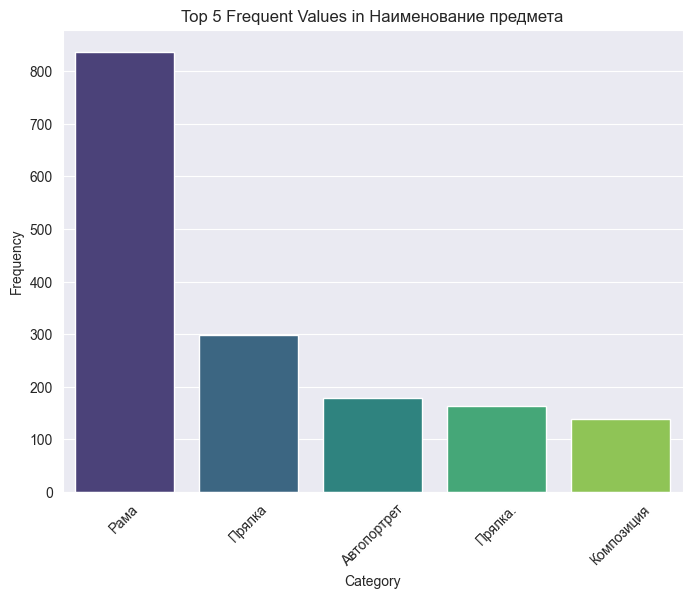

Автор


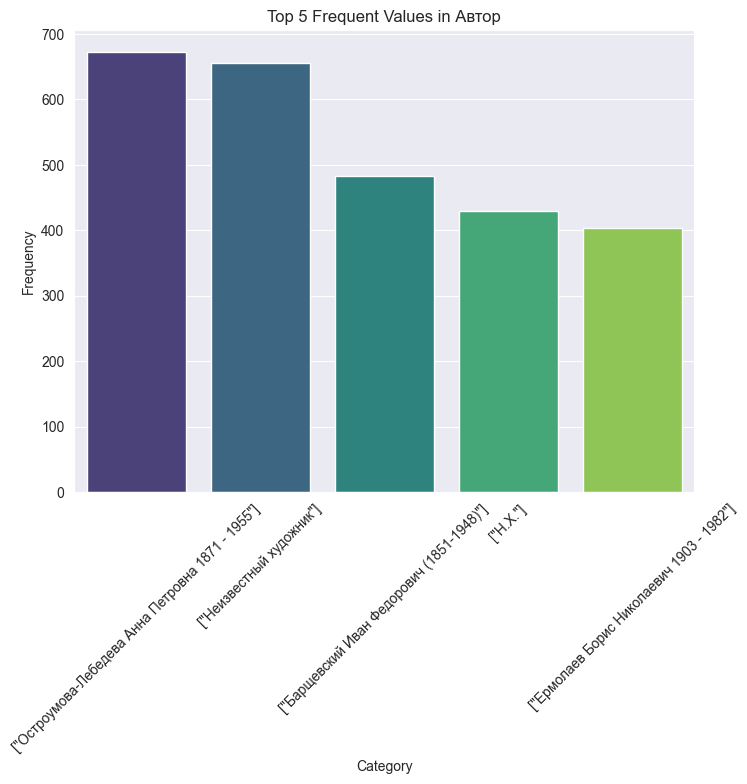

Музей


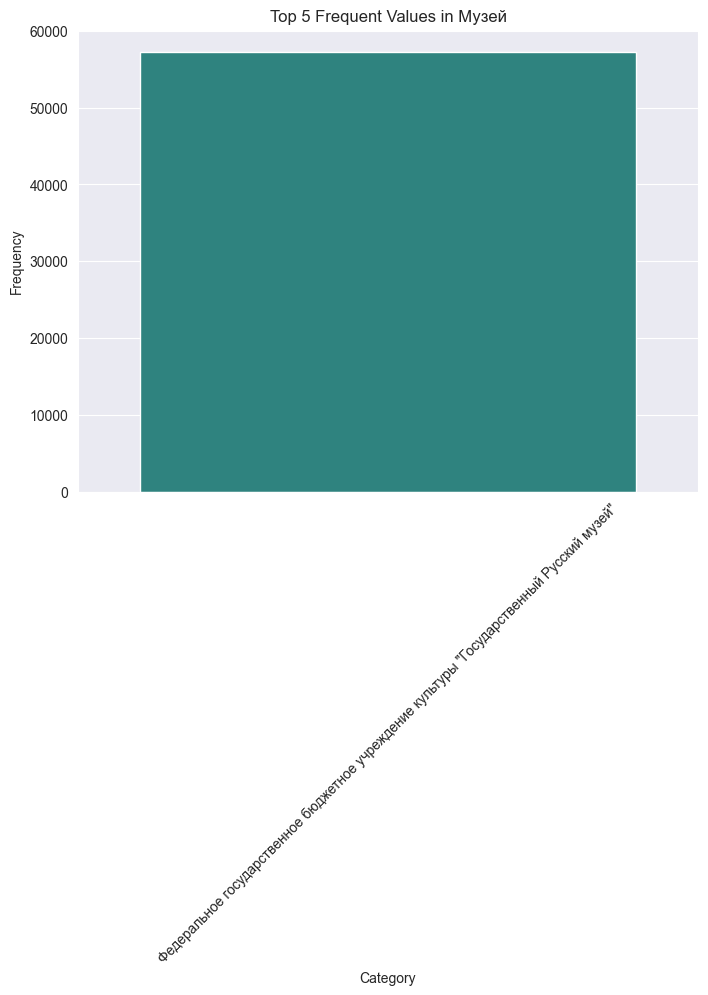

Items


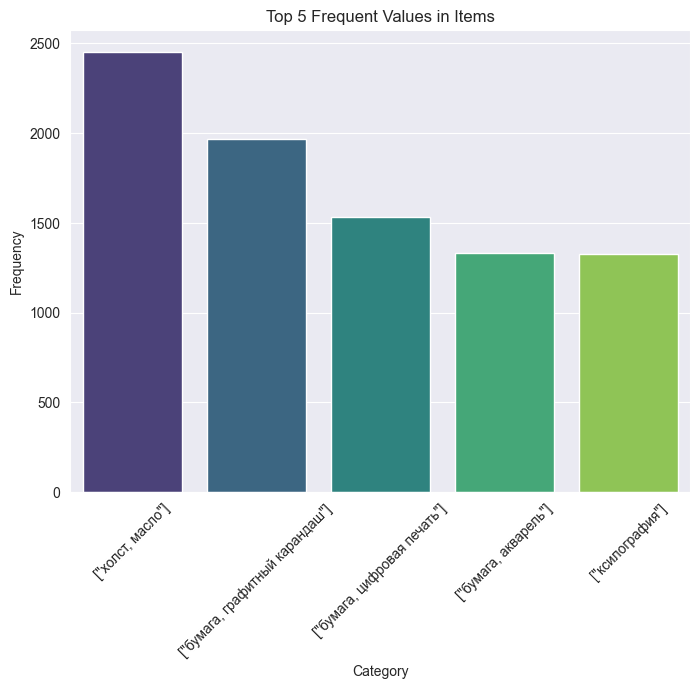

Дата создания предмета (строка)


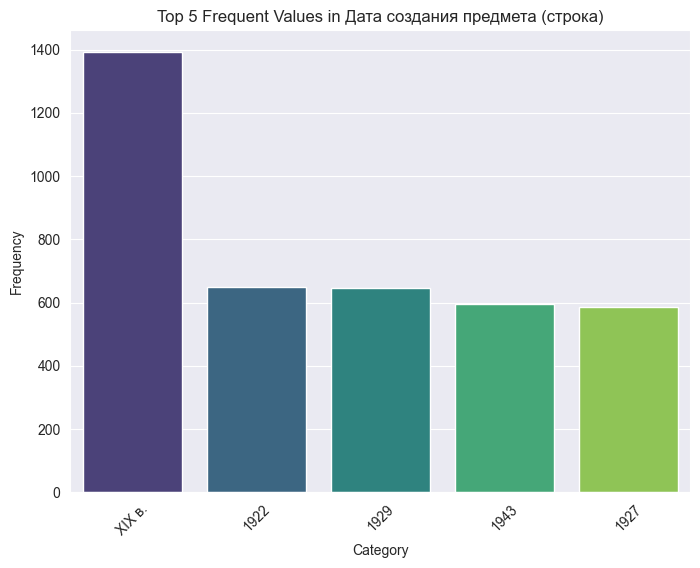

Место создания


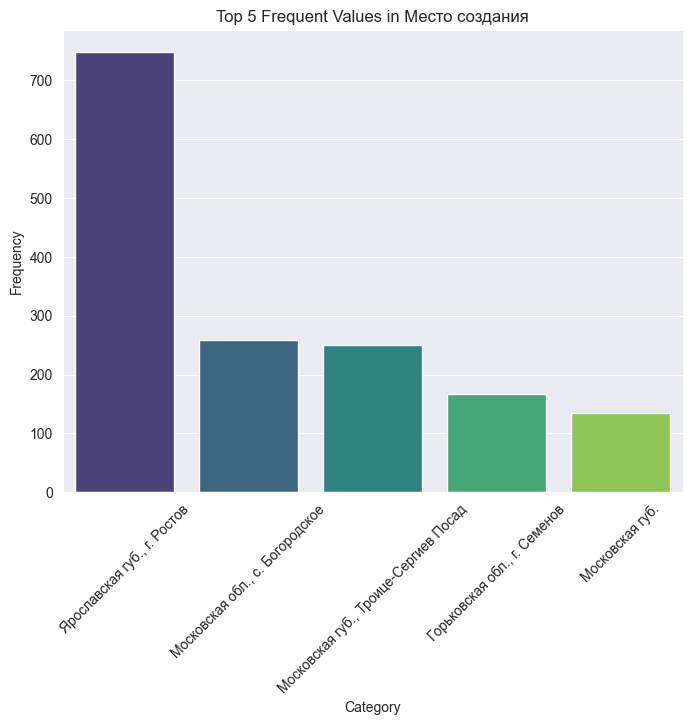

Строковое описание размеров


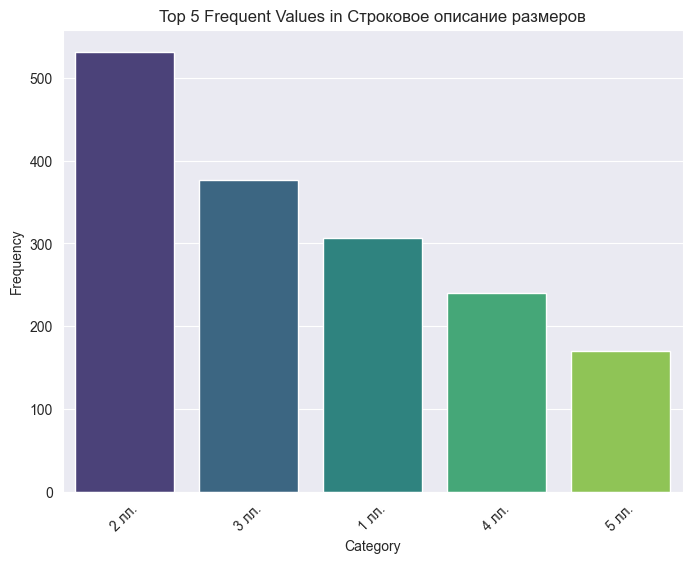

Описание


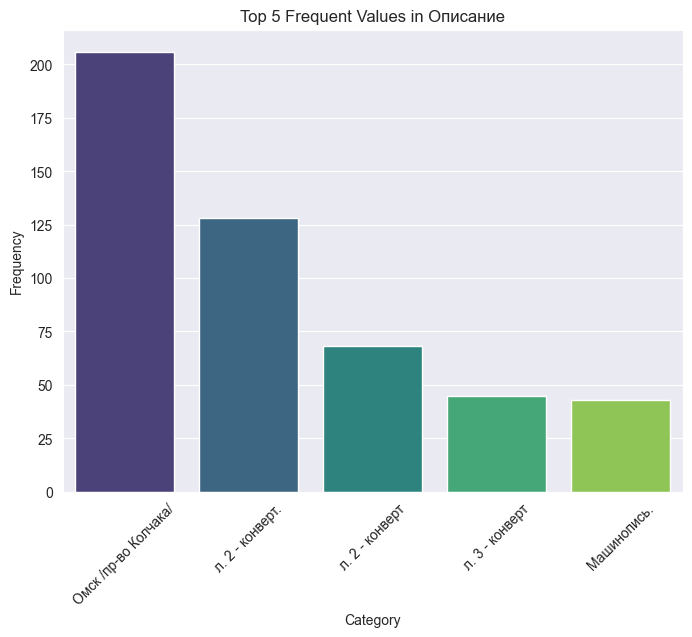

Количество составляющих
Изображение


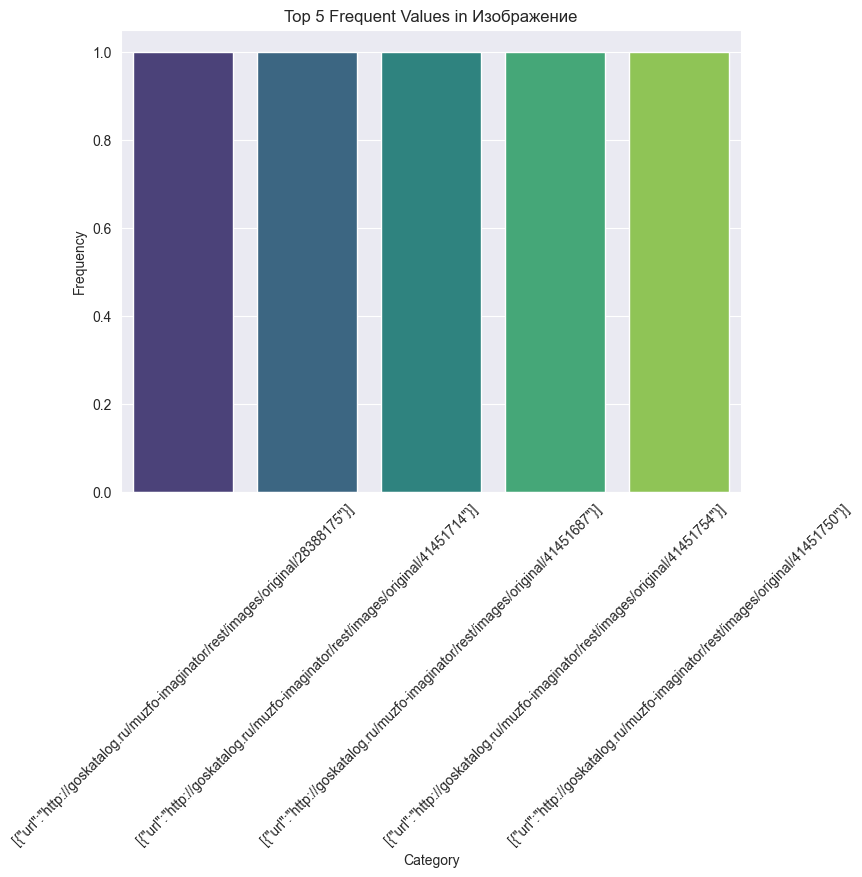

Регистрационный номер Госкаталога
Дата регистрации записи.


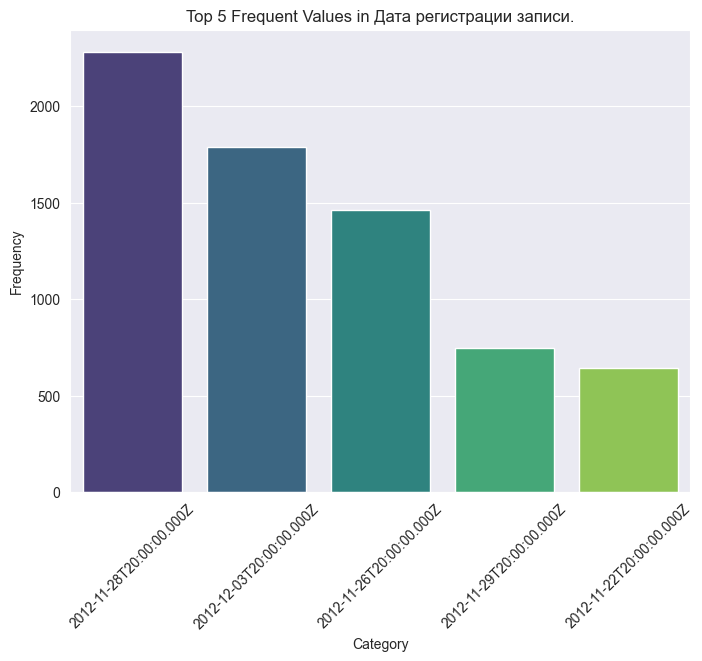

Инвентарный номер


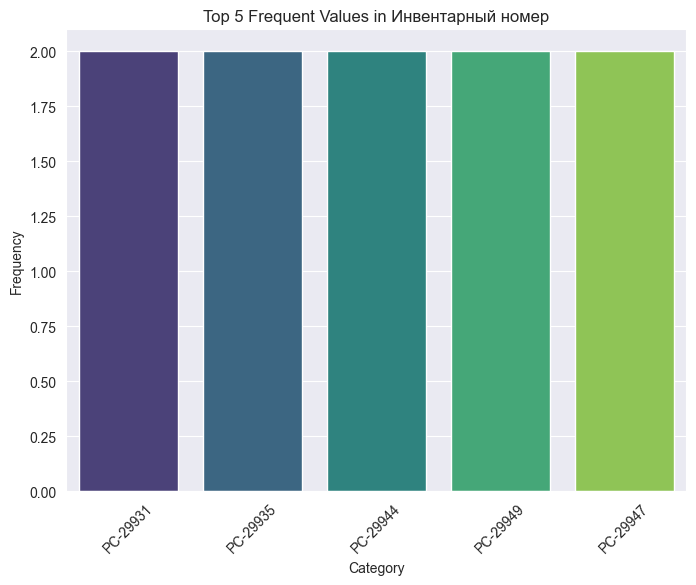

Номер по ГИК


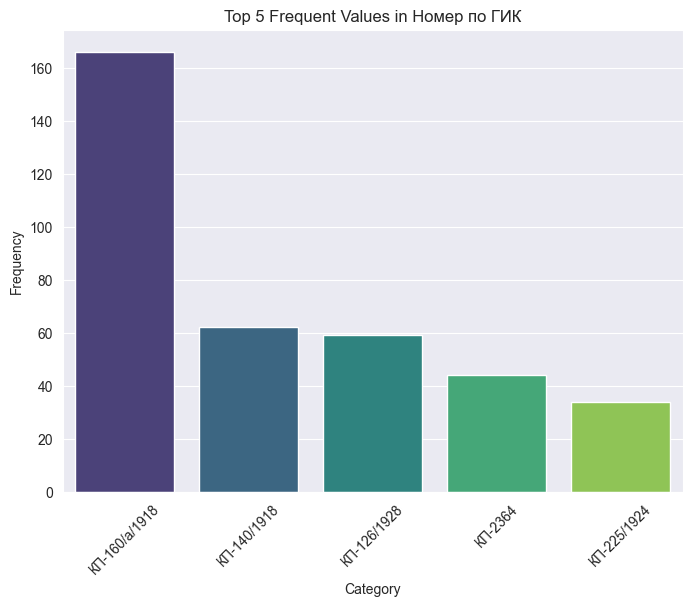

Ширина
Высота
Длина
Единица измерения размера


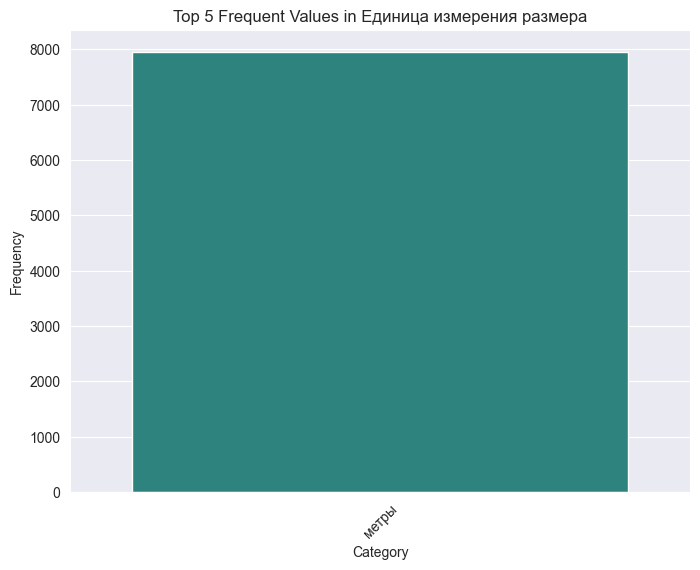

Интервал времени создания предмета (начало)


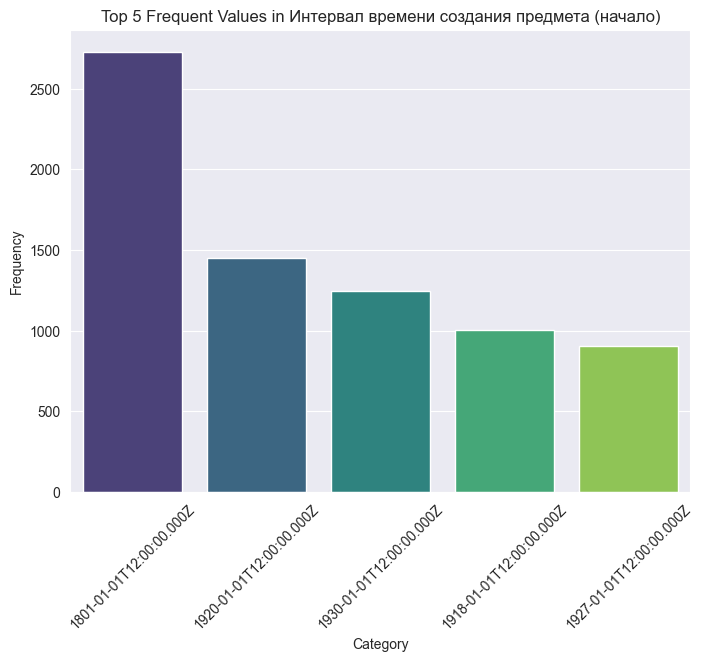

Интервал времени создания предмета (окончание)


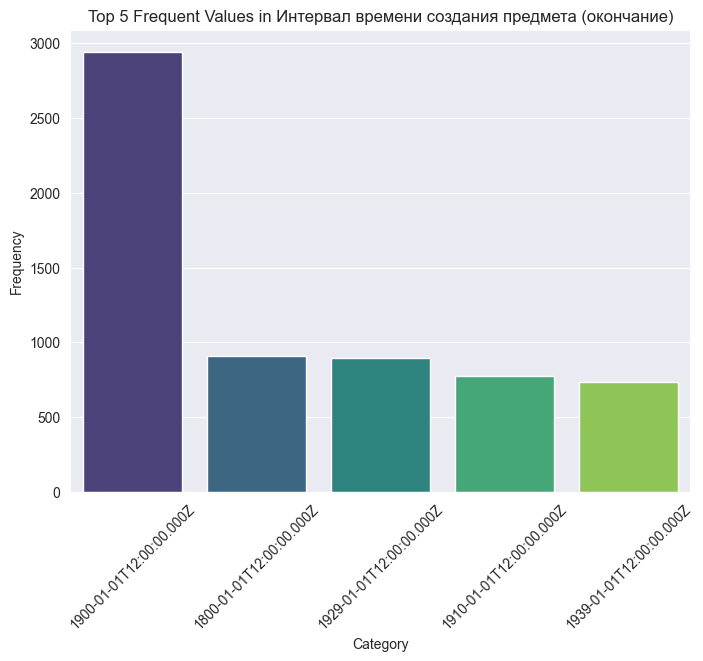

Точность задания времени (день, месяц, год, век, эпоха).


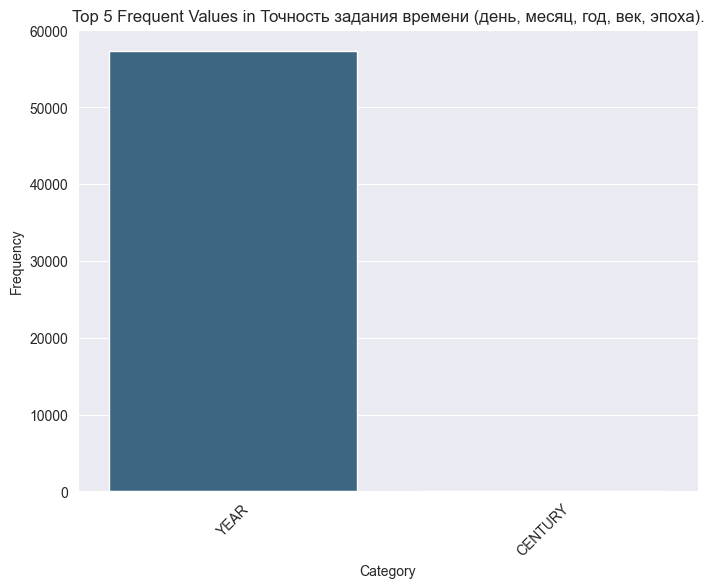

URL предмета на сайте музея


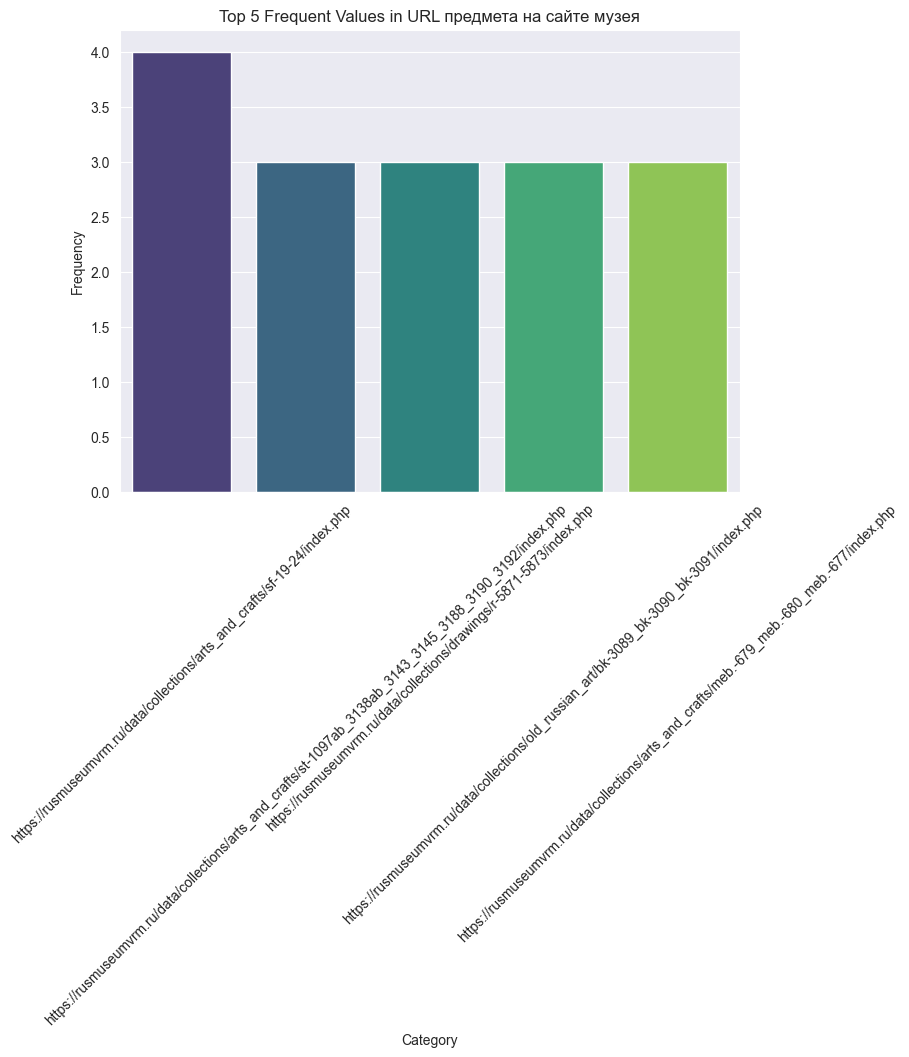

Ключевые слова
Краткое описание истории бытования (провенанс) предмета
Идентификатор статуса предмета
Типология


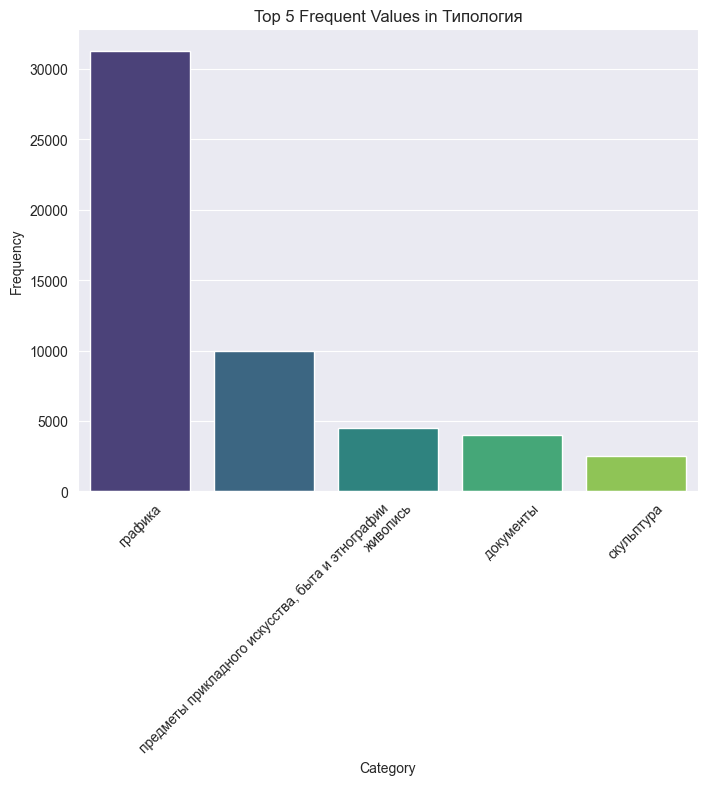

In [ ]:
 for column in data_cleaned.columns:
    print(column)
    if data[column].dtype == 'object' or data[column].dtype.name == 'category':
        # Получаем топ-5 частых значений для каждого категориального признака
        top_5 = data_cleaned[column].value_counts().head(5)
        get_graph(top_5, column)


In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57254 entries, 0 to 57253
Data columns (total 26 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Наименование предмета                                     57254 non-null  object 
 1   Автор                                                     44004 non-null  object 
 2   Музей                                                     57254 non-null  object 
 3   Items                                                     54817 non-null  object 
 4   Дата создания предмета (строка)                           55223 non-null  object 
 5   Место создания                                            6178 non-null   object 
 6   Строковое описание размеров                               57248 non-null  object 
 7   Описание                                                  57254 non-null  object 
 8   Количество соста

In [ ]:
# Исключаем неинформативные признаки
cols_for_drop = ['Музей', 'Строковое описание размеров', 'Количество составляющих', 'Инвентарный номер', 'Номер по ГИК',
                 'Ширина', 'Длина', 'Единица измерения размера', 'Место создания', 'Количество составляющих',
                 'Ключевые слова', 'URL предмета на сайте музея', 'Высота', 'Идентификатор статуса предмета',
                 'Краткое описание истории бытования (провенанс) предмета',
                 'Точность задания времени (день, месяц, год, век, эпоха).',
                 'Интервал времени создания предмета (начало)',
                 'Интервал времени создания предмета (окончание)',

                 ]
data_cleaned.drop(cols_for_drop, axis=1, inplace=True)

In [ ]:
data_cleaned

,Наименование предмета,Автор,Items,Дата создания предмета (строка),Описание,Изображение,Регистрационный номер Госкаталога,Дата регистрации записи.,Типология
0,Декоративный мотив.,"[""Малевич Казимир Северинович 1879-1935""]","[""бумага, тушь""]",1908,В вертикальной прямоугольной рамке декоративны...,"[{""url"":""http://goskatalog.ru/muzfo-imaginator...",10479770.0,2018-01-31T12:54:54.729Z,графика
1,Женский портрет в шляпе с пером. На обороте: Н...,"[""Малевич Казимир Северинович (1879-1935)""]","[""бумага, графитный карандаш, растушевка""]",Конец 1900-х,"Портрет женщины в шляпе с пером (фронтально, о...","[{""url"":""http://goskatalog.ru/muzfo-imaginator...",10479769.0,2018-01-31T12:54:54.729Z,графика
2,Декоративные мотивы. Три виньетки,"[""Малевич Казимир Северинович (1879-1935)""]","[""бумага верже, тушь, перо""]",Ок. 1908 (?),Три виньетки. Слева: овальная виньетка с цвето...,"[{""url"":""http://goskatalog.ru/muzfo-imaginator...",10479768.0,2018-01-31T12:54:54.729Z,графика
3,Два женских портрета.,"[""Малевич Казимир Северинович 1879-1935""]","[""бумага, черные чернила""]",Конец 1920-х - начало 1930-х,"Один под другим, в рамках: два женских портрет...","[{""url"":""http://goskatalog.ru/muzfo-imaginator...",10479767.0,2018-01-31T12:54:54.729Z,графика
4,Женский портрет (погрудный).,"[""Малевич Казимир Северинович (1879-1935)""]","[""бумага, бумага цветная, тушь, гуашь, наклейка""]",Сер.-2-ая половина 1900-х (?),В круге: на фоне с цветочными узорами - поясн...,"[{""url"":""http://goskatalog.ru/muzfo-imaginator...",10479766.0,2018-01-31T12:54:54.729Z,графика
...,...,...,...,...,...,...,...,...,...
57249,Портрет Анны Андреевны Ахматовой.,"[""Петров-Водкин Кузьма Сергеевич (1878-1939)""]","[""холст, масло""]",1922,"Ахматова изображена по плечи, с поворотом слег...","[{""url"":""http://goskatalog.ru/muzfo-imaginator...",9876002.0,2017-12-11T11:44:01.596Z,живопись
57250,Зима.,"[""Павлов Семен Андреевич 1893 - 1941""]","[""холст, масло""]",1923,Городской пейзаж. На первом плане: справа руин...,"[{""url"":""http://goskatalog.ru/muzfo-imaginator...",9876001.0,2017-12-11T11:44:01.596Z,живопись
57251,Лестница. Ленинский проспект,"[""Волков Владимир Петрович 1923-1987""]","[""холст, масло""]",1987,Абстрактная композиция состоящая из прямоуголь...,"[{""url"":""http://goskatalog.ru/muzfo-imaginator...",9876000.0,2017-12-11T11:44:01.596Z,живопись
57252,Без названия,"[""Добротворский Сергей Николаевич 1959-1997""]","[""холст на фанере, масло""]",Конец 1980-х гг.,В верхней части картины - летящий влево желты...,"[{""url"":""http://goskatalog.ru/muzfo-imaginator...",9875998.0,2017-12-11T11:44:01.596Z,живопись


In [ ]:
data_cleaned.columns

Index(['Наименование предмета', 'Автор', 'Items',
       'Дата создания предмета (строка)', 'Описание', 'Изображение',
       'Регистрационный номер Госкаталога', 'Дата регистрации записи.',
       'Типология'],
      dtype='object')

In [ ]:
# Переименовываем столбцы
data_cleaned = data_cleaned.rename(columns={
    'Наименование предмета': 'title',
    'Автор': 'author',
    'Items': 'items',
    'Описание': 'description',
    'Изображение': 'image_url',
    'Регистрационный номер Госкаталога': 'catalog_num',
    'Дата регистрации записи.': 'registration_date',
    'Типология': 'typology',
    'Дата создания предмета (строка)': 'creation_date',

})

In [ ]:
data_cleaned.columns

Index(['title', 'author', 'items', 'creation_date', 'description', 'image_url',
       'catalog_num', 'registration_date', 'typology'],
      dtype='object')

## Разделение столбца Автор

In [ ]:
data_cleaned[['author_lastname', 'author_name', 'author_patronymic', 'other_info']] = (data_cleaned['author']
                                                                                       .str.replace('["', '')
                                                                                       .str.replace('"]', '')
                                                                                       .str.split(' ', n=3,
                                                                                                  expand=True))
data_cleaned.drop('author', axis=1, inplace=True)

## Выбор графики и живописи

In [ ]:
data_cleaned['typology'].value_counts()

typology
графика                                              31225
предметы прикладного искусства, быта и этнографии     9973
живопись                                              4482
документы                                             4033
скульптура                                            2493
предметы нумизматики                                  2175
прочие                                                1934
фотографии и негативы                                  939
Name: count, dtype: int64

In [ ]:
# Приводим столбец 'Типология' к нижнему регистру и удаляем лишние пробелы
data_cleaned['typology'] = data_cleaned['typology'].str.strip().str.lower()

# Выбираем строки с типологией 'графика' или 'живопись'
picture_data = data_cleaned[data_cleaned['typology'].isin(['графика', 'живопись'])].reset_index(drop=True)

In [ ]:
picture_data

,title,items,creation_date,description,image_url,catalog_num,registration_date,typology,author_lastname,author_name,author_patronymic,other_info
0,Декоративный мотив.,"[""бумага, тушь""]",1908,В вертикальной прямоугольной рамке декоративны...,"[{""url"":""http://goskatalog.ru/muzfo-imaginator...",10479770.0,2018-01-31T12:54:54.729Z,графика,Малевич,Казимир,Северинович,1879-1935
1,Женский портрет в шляпе с пером. На обороте: Н...,"[""бумага, графитный карандаш, растушевка""]",Конец 1900-х,"Портрет женщины в шляпе с пером (фронтально, о...","[{""url"":""http://goskatalog.ru/muzfo-imaginator...",10479769.0,2018-01-31T12:54:54.729Z,графика,Малевич,Казимир,Северинович,(1879-1935)
2,Декоративные мотивы. Три виньетки,"[""бумага верже, тушь, перо""]",Ок. 1908 (?),Три виньетки. Слева: овальная виньетка с цвето...,"[{""url"":""http://goskatalog.ru/muzfo-imaginator...",10479768.0,2018-01-31T12:54:54.729Z,графика,Малевич,Казимир,Северинович,(1879-1935)
3,Два женских портрета.,"[""бумага, черные чернила""]",Конец 1920-х - начало 1930-х,"Один под другим, в рамках: два женских портрет...","[{""url"":""http://goskatalog.ru/muzfo-imaginator...",10479767.0,2018-01-31T12:54:54.729Z,графика,Малевич,Казимир,Северинович,1879-1935
4,Женский портрет (погрудный).,"[""бумага, бумага цветная, тушь, гуашь, наклейка""]",Сер.-2-ая половина 1900-х (?),В круге: на фоне с цветочными узорами - поясн...,"[{""url"":""http://goskatalog.ru/muzfo-imaginator...",10479766.0,2018-01-31T12:54:54.729Z,графика,Малевич,Казимир,Северинович,(1879-1935)
...,...,...,...,...,...,...,...,...,...,...,...,...
35702,Портрет Анны Андреевны Ахматовой.,"[""холст, масло""]",1922,"Ахматова изображена по плечи, с поворотом слег...","[{""url"":""http://goskatalog.ru/muzfo-imaginator...",9876002.0,2017-12-11T11:44:01.596Z,живопись,Петров-Водкин,Кузьма,Сергеевич,(1878-1939)
35703,Зима.,"[""холст, масло""]",1923,Городской пейзаж. На первом плане: справа руин...,"[{""url"":""http://goskatalog.ru/muzfo-imaginator...",9876001.0,2017-12-11T11:44:01.596Z,живопись,Павлов,Семен,Андреевич,1893 - 1941
35704,Лестница. Ленинский проспект,"[""холст, масло""]",1987,Абстрактная композиция состоящая из прямоуголь...,"[{""url"":""http://goskatalog.ru/muzfo-imaginator...",9876000.0,2017-12-11T11:44:01.596Z,живопись,Волков,Владимир,Петрович,1923-1987
35705,Без названия,"[""холст на фанере, масло""]",Конец 1980-х гг.,В верхней части картины - летящий влево желты...,"[{""url"":""http://goskatalog.ru/muzfo-imaginator...",9875998.0,2017-12-11T11:44:01.596Z,живопись,Добротворский,Сергей,Николаевич,1959-1997


In [ ]:
# Выбор данных, которые не относятся к 'графика' и 'живопись'
other_data = data_cleaned[~data_cleaned['typology'].isin(['графика', 'живопись'])]
other_data.to_csv(f'{df_path}/other_data.csv', index=False)

## Очистка столбца Материалы

In [ ]:
picture_data['items'] = picture_data['items'].str.replace('["', '').str.replace('"]', '')

In [ ]:
picture_data['items']

0                                         бумага, тушь
1               бумага, графитный карандаш, растушевка
2                             бумага верже, тушь, перо
3                               бумага, черные чернила
4        бумага, бумага цветная, тушь, гуашь, наклейка
                             ...                      
35702                                     холст, масло
35703                                     холст, масло
35704                                     холст, масло
35705                           холст на фанере, масло
35706                                     холст, масло
Name: items, Length: 35707, dtype: object

In [ ]:
synonyms = {
    r'^графитный карандаш$': 'карандаш',
    r'^цветной карандаш$': 'карандаш',
    r'^карандаш графитовый$': 'карандаш',
    r'^карандаш графитный$': 'карандаш',
    r'^цифровая печать$': 'печать',
    r'^типографская печать$': 'печать',
    r'^альбуминовая печать$': 'печать',
    r'^лит$': 'литография',
    r'^литография с тоном$': 'литография',
    r'^литография цветная$': 'литография',
    r'^бумага верже$': 'бумага',
    r'^роспись полихромная$': 'роспись',
    r'^б.$': 'бумага',
    r'^черные чернила$': 'тушь',
    r'^акв$': 'акварель',
    r'^акв\.$': 'акварель',
    r'^гравюра пунктиром$': 'гравюра',
    r'^гравюра на дереве$': 'гравюра',
    r'^карандаш итальянский$': 'карандаш',
    r'^гравюра резцом$': 'гравюра',
    r'^бумага на картоне$': 'бумага',
    r'^бумага серая$': 'бумага',
    r'^черный карандаш$': 'карандаш',
    r'^граф\. кар\.$': 'карандаш',
    r'^карандаши цветные$': 'карандаш',
    r'^карандаш черный$': 'карандаш',
    r'^акварель черная$': 'акварель',
    r'^линогравюра$': 'гравюра',
    r'^шариковая ручка$': 'чернила',
    r'^хромолитография$': 'литография',
    r'^автолитография$': 'литография',
    r'^литография раскрашенная$': 'литография',
    r'^фанера$': 'дерево',
    r'^акварельарель черная$': 'акварель',
    r'^цветная литография$': 'литография',
    r'^граф\. кар$': 'карандаш',
    r'^холст на картоне$': 'холст',
    r'^карандаш угольный$': 'карандаш',
    r'^бумага цветная$': 'бумага',
    r'^бумага желтая$': 'бумага',
    r'^бумага черная$': 'бумага',
    r'^черная акварель$': 'акварель',
    r'^акварель атинта$': 'акварель',
    r'^\\nмасло$': 'масло',
    r'^гравюра цветная$': 'гравюра',
    r'^итальянский карандаш$': 'карандаш',
    r'^гравюра раскрашенная$': 'гравюра',
    r'^монотипия цветная$': 'монотипия',
    r'^уголь прессованный$': 'уголь',
    r'^граф\.кар\.$': 'картон',
    r'^бумага желтоватая$': 'бумага',
    r'^бумага коричневая$': 'бумага',
    r'^цветные карандаши$': 'карандаш',
    r'^карандаш свинцовый$': 'карандаш',
    r'^холст,масло$': 'масло',
    r'^масляная пастель$': 'пастель',
    r'^наклеенная на белую бумагу$': 'аппликация',
    r'^наклейки$': 'аппликация',
    r'^бумага мелованная$': 'бумага',
    r'^ксилография цветная$': 'ксилография',
    r'^карандаш литографский$': 'литография',
    r'^тушь цветная$': 'тушь',
    r'^мягкий лак$': 'лак',
    r'^гравюра на картоне$': 'гравюра',
    r'^картон мелованный$': 'картон',
    r'^бронзовая краска$': 'бронза',
    r'^к\.$': 'картон',
    r'^бумага голубая$': 'бумага',
    r'^бумага оберточная$': 'бумага',
    r'^слоновая кость\\nминиатюра$': 'миниатюра',
    r'^автолитография цветная$': 'литография',
    r'^гравюра резцом раскрашенная$': 'гравюра',
    r'^линогравюра цветная$': 'гравюра',
    r'^черн. акв$': 'акварель',
    r'^холст,\\nмасло$': 'масло',
    r'^цв. кар$': 'картон',
    r'^бумага зеленая$': 'бумага'

}


In [ ]:
def clean_material(material, synonyms):
    if pd.isna(material):
        material = ''
    else:
        material = material.strip().lower()
    for old, new in synonyms.items():
        material = re.sub(old, new, material)
    return material

In [ ]:
def analyze_top_materials(dataframe, column_name, synonyms, top_n=50):
    all_materials = dataframe[column_name].str.split(', ').explode()
    all_materials_cleaned = all_materials.progress_apply(lambda material: clean_material(material, synonyms))
    material_counts = Counter(all_materials_cleaned)
    counter = pd.DataFrame.from_dict(material_counts, orient='index', columns=['Count'])
    counter_cleaned = counter.sort_values(by='Count', ascending=False)
    top_materials = counter_cleaned.head(top_n)

    return top_materials.index.tolist()


In [ ]:
top_50 = analyze_top_materials(picture_data, 'items', synonyms)
top_50

Processing rows...: 100%|███████████████████████████████████| 74848/74848 [00:08<00:00, 8835.17it/s]


['бумага',
 'карандаш',
 'акварель',
 'тушь',
 'масло',
 'литография',
 'холст',
 'гуашь',
 'перо',
 'гравюра',
 'уголь',
 'ксилография',
 'графит',
 'белила',
 'картон',
 'темпера',
 'офорт',
 'пастель',
 'сепия',
 'чернила',
 'кисть',
 'дерево',
 'сангина',
 'калька',
 'хромолит',
 'аппликация',
 'фломастер',
 'оргалит',
 'бронза',
 'лак',
 'коллаж',
 'монотипия',
 'акрил',
 'растушка',
 'соус',
 'процарапывание',
 'смешанная техника',
 'акватинта',
 'цинкография',
 'мел',
 'серебро',
 'сухая игла',
 'бистр',
 'ламповая копоть',
 'левкас',
 'миниатюра',
 'золотая краска',
 'клеевая краска',
 'типографский оттиск',
 'живопись яичными красками']

In [ ]:
# Функция для обработки строки
def process_items(item):
    if pd.isna(item):
        return ''
    # Разделяем строку на отдельные материалы
    materials = item.split(', ')
    # Заменяем синонимы
    materials = [material for material in materials if material in top_50]
    # Удаляем дубликаты и сортируем
    return ','.join(sorted(set(materials)))

In [ ]:
# Преобразуем столбец items в key_words
picture_data['key_materials'] = picture_data['items'].progress_apply(process_items)

Processing rows...: 100%|█████████████████████████████████| 35707/35707 [00:00<00:00, 216571.65it/s]


In [ ]:
picture_data['key_materials']

0              бумага,тушь
1                   бумага
2                перо,тушь
3                   бумага
4        бумага,гуашь,тушь
               ...        
35702          масло,холст
35703          масло,холст
35704          масло,холст
35705                масло
35706          масло,холст
Name: key_materials, Length: 35707, dtype: object

In [ ]:
picture_data.to_csv(f'{df_path}/picture_data_with_key_material.csv', index=False, encoding='utf-8', sep=';')

## Очистка столбца с датами

In [ ]:
# функция для предобработки дат
def process_date(date_str):
    try:
        # Проверка на NaN
        if pd.isna(date_str):
            return "Неизвестно"

        # Преобразуем строку
        date_str = re.sub(r"[^\w\s\-]", "", date_str).lower()
        date_str = date_str.replace("х", "х годов")

        # Обработка "конец" (например, "конец 1920-х" или "конец 1900-х")
        if "конец" in date_str:
            decades = re.findall(r"\d{3,4}", date_str)
            if len(decades) == 1:
                start = int(decades[0])
                if start % 100 != 0:
                    return f"{start + 6}-{start + 9}"  # для конца десятилетия, например, конец 1920-х -> 1926-1929
                else:
                    return f"{start + 96}-{start + 99}"  # для конца десятилетия после 1900-х, например, конец 1900-х -> 1996-1999
            elif len(decades) == 2:
                return f"{decades[0]}-{decades[1]}"

        # Обработка "начало" (например, "начало 1920-х")
        if "начало" in date_str:
            decades = re.findall(r"\d{3,4}", date_str)
            if len(decades) == 1:
                start = int(decades[0])
                return f"{start}-{start + 9}"  # для начала десятилетия, например, начало 1920-х -> 1920-1929
            elif len(decades) == 2:
                return f"{decades[0]}-{decades[1]}"

        # Обработка "середина" (например, "середина 1920-х")
        if "середина" in date_str:
            decades = re.findall(r"\d{3,4}", date_str)
            if len(decades) == 1:
                start = int(decades[0])
                return f"{start + 4}-{start + 5}"

        # Обработка "1-я половина" и "2-я половина"
        if "1-я половина" in date_str or "1-ая половина" in date_str:
            decades = re.findall(r"\d{3,4}", date_str)
            if len(decades) == 1:
                start = int(decades[0])
                return f"{start}-{start + 49}"

        if "2-я половина" in date_str or "2-ая половина" in date_str:
            decades = re.findall(r"\d{3,4}", date_str)
            if len(decades) == 1:
                start = int(decades[0])
                return f"{start + 50}-{start + 99}"

        # Обработка диапазонов
        if "-" in date_str:
            years = re.findall(r"\d{4}", date_str)
            if len(years) == 2:
                start_year = int(years[0])
                end_year = int(years[1])
                if start_year >= 1000 and end_year <= 3000:
                    return f"{start_year}-{end_year}"
            elif len(years) == 1:
                return f"{years[0]}"

        # Обработка "около"
        if "ок" in date_str or "примерно" in date_str:
            years = re.findall(r"\d{4}", date_str)
            if len(years) == 1:
                return years[0]

        # Обработка одиночных годов
        years = re.findall(r"\d{4}", date_str)
        if len(years) == 1:
            return years[0]
        # Если ничего не найдено
        return "Неизвестно"
    except:
        return "Ошибка"


In [ ]:
# Обработка всех строк
picture_data['date_cleaned'] = picture_data['creation_date'].progress_apply(process_date)
picture_data[['date_cleaned', 'creation_date']]

Processing rows...: 100%|█████████████████████████████████| 35707/35707 [00:00<00:00, 105571.25it/s]


,date_cleaned,creation_date
0,1908,1908
1,1996-1999,Конец 1900-х
2,1908,Ок. 1908 (?)
3,1920-1930,Конец 1920-х - начало 1930-х
4,1950-1999,Сер.-2-ая половина 1900-х (?)
...,...,...
35702,1922,1922
35703,1923,1923
35704,1987,1987
35705,1986-1989,Конец 1980-х гг.


In [ ]:
def categorize_date(date_str):
    try:
        # Проверка на NaN и ошибки
        if pd.isna(date_str) or date_str == "Неизвестно":
            return "Неизвестно"

        # Обработка диапазонов (например, 1920-1930)
        if "-" in date_str:
            years = re.findall(r"\d{4}", date_str)
            if len(years) == 2:
                start_year = int(years[0])
                end_year = int(years[1])
                avg_year = (start_year + end_year) // 2
            else:
                return "Неизвестно"
        else:
            avg_year = int(date_str)

        # Определяем век на основе среднего года
        century = (avg_year // 100) + 1

        # Определяем, первая или вторая половина века
        if avg_year % 100 <= 50:
            return f"1-я пол.{century}"
        else:
            return f"2-я пол.{century}"

    except:
        return f"Ошибка"

In [ ]:
picture_data['date_category'] = picture_data['date_cleaned'].progress_apply(categorize_date)
picture_data[['date_category', 'date_cleaned', 'creation_date']]

Processing rows...: 100%|█████████████████████████████████| 35707/35707 [00:00<00:00, 181011.27it/s]


,date_category,date_cleaned,creation_date
0,1-я пол.20,1908,1908
1,2-я пол.20,1996-1999,Конец 1900-х
2,1-я пол.20,1908,Ок. 1908 (?)
3,1-я пол.20,1920-1930,Конец 1920-х - начало 1930-х
4,2-я пол.20,1950-1999,Сер.-2-ая половина 1900-х (?)
...,...,...,...
35702,1-я пол.20,1922,1922
35703,1-я пол.20,1923,1923
35704,2-я пол.20,1987,1987
35705,2-я пол.20,1986-1989,Конец 1980-х гг.


In [ ]:
picture_data.to_csv(f'{df_path}/picture_data_with_date_and_materials.csv', sep=';', encoding='utf-8', index=False)

# Поиск ключевых слов по названию и описанию

In [ ]:
import spacy
from tqdm.notebook import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
!python -m spacy download ru_core_news_sm

In [ ]:
# Загрузка модели spacy для русского языка
nlp = spacy.load("ru_core_news_sm")

In [ ]:
# Функция для лемматизации текста с использованием spacy
def lemmatize_text_spacy(text):
    doc = nlp(text)
    lemmatized_words = [token.lemma_ for token in doc]
    return ' '.join(lemmatized_words)

In [ ]:
def extract_keywords_with_tfidf(df, top_n=20):
    # Объединяем описание и название в единый текст и лемматизируем
    df['combined_text'] = df['description'] + ' ' + df['title']
    df['lemmatized_text'] = df['combined_text'].apply(lemmatize_text_spacy)

    # Вычисляем TF-IDF на основе лемматизированного текста
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(df['lemmatized_text'])
    feature_names = vectorizer.get_feature_names_out()

    df['key_words'] = ''

    for index in tqdm(range(len(df)), total=len(df), desc="Processing rows", ncols=100):
        # Получаем TF-IDF веса для текущей строки
        tfidf_vector = tfidf_matrix[index].toarray().flatten()
        top_indices = tfidf_vector.argsort()[-top_n:][::-1]

        # Извлекаем ключевые слова
        key_words = [feature_names[i] for i in top_indices if tfidf_vector[i] > 0]

        # Сохраняем ключевые слова
        df.at[index, 'key_words'] = ','.join(key_words)

    # Удаляем временные колонки
    df.drop(columns=['combined_text', 'lemmatized_text'], inplace=True)

    return df

In [ ]:
df = extract_keywords_with_tfidf(picture_data)

Processing rows:   0%|                                                    | 0/35707 [00:00<?, ?it/s]

In [ ]:
# Сохранение результата в CSV файл
df.to_csv(f'{df_path}/picture_data_with_keywords.csv', index=False, sep=';', encoding='utf-8')

In [ ]:
df

,title,items,creation_date,description,image_url,catalog_num,registration_date,typology,author_lastname,author_name,author_patronymic,other_info,key_materials,date_cleaned,date_category,key_words
0,Декоративный мотив.,"бумага, тушь",1908,В вертикальной прямоугольной рамке декоративны...,"[{""url"":""http://goskatalog.ru/muzfo-imaginator...",10479770.0,2018-01-31T12:54:54.729Z,графика,Малевич,Казимир,Северинович,1879-1935,"бумага,тушь",1908,1-я пол.20,"мотив,декоративный,нанизанными,стержень,диск,ц..."
1,Женский портрет в шляпе с пером. На обороте: Н...,"бумага, графитный карандаш, растушевка",Конец 1900-х,"Портрет женщины в шляпе с пером (фронтально, о...","[{""url"":""http://goskatalog.ru/muzfo-imaginator...",10479769.0,2018-01-31T12:54:54.729Z,графика,Малевич,Казимир,Северинович,(1879-1935),бумага,1996-1999,2-я пол.20,"младенец,оборот,шляпа,на,женщина,портрет,пером..."
2,Декоративные мотивы. Три виньетки,"бумага верже, тушь, перо",Ок. 1908 (?),Три виньетки. Слева: овальная виньетка с цвето...,"[{""url"":""http://goskatalog.ru/muzfo-imaginator...",10479768.0,2018-01-31T12:54:54.729Z,графика,Малевич,Казимир,Северинович,(1879-1935),"перо,тушь",1908,1-я пол.20,"виньетка,прямоугольный,три,стеблями,рамка,симм..."
3,Два женских портрета.,"бумага, черные чернила",Конец 1920-х - начало 1930-х,"Один под другим, в рамках: два женских портрет...","[{""url"":""http://goskatalog.ru/muzfo-imaginator...",10479767.0,2018-01-31T12:54:54.729Z,графика,Малевич,Казимир,Северинович,1879-1935,бумага,1920-1930,1-я пол.20,"изображенной,недлинный,распущенные,платье,женс..."
4,Женский портрет (погрудный).,"бумага, бумага цветная, тушь, гуашь, наклейка",Сер.-2-ая половина 1900-х (?),В круге: на фоне с цветочными узорами - поясн...,"[{""url"":""http://goskatalog.ru/muzfo-imaginator...",10479766.0,2018-01-31T12:54:54.729Z,графика,Малевич,Казимир,Северинович,(1879-1935),"бумага,гуашь,тушь",1950-1999,2-я пол.20,"круг,крапинка,вставка,цветочный,картон,портрет..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35702,Портрет Анны Андреевны Ахматовой.,"холст, масло",1922,"Ахматова изображена по плечи, с поворотом слег...","[{""url"":""http://goskatalog.ru/muzfo-imaginator...",9876002.0,2017-12-11T11:44:01.596Z,живопись,Петров-Водкин,Кузьма,Сергеевич,(1878-1939),"масло,холст",1922,1-я пол.20,"ахматов,синий,подстричь,горбинка,андреевич,отл..."
35703,Зима.,"холст, масло",1923,Городской пейзаж. На первом плане: справа руин...,"[{""url"":""http://goskatalog.ru/muzfo-imaginator...",9876001.0,2017-12-11T11:44:01.596Z,живопись,Павлов,Семен,Андреевич,1893 - 1941,"масло,холст",1923,1-я пол.20,"дом,серый,полуразрушенные,разбитый,кирпичный,в..."
35704,Лестница. Ленинский проспект,"холст, масло",1987,Абстрактная композиция состоящая из прямоуголь...,"[{""url"":""http://goskatalog.ru/muzfo-imaginator...",9876000.0,2017-12-11T11:44:01.596Z,живопись,Волков,Владимир,Петрович,1923-1987,"масло,холст",1987,2-я пол.20,"ленинский,овала,проспект,напоминать,цветной,со..."
35705,Без названия,"холст на фанере, масло",Конец 1980-х гг.,В верхней части картины - летящий влево желты...,"[{""url"":""http://goskatalog.ru/muzfo-imaginator...",9875998.0,2017-12-11T11:44:01.596Z,живопись,Добротворский,Сергей,Николаевич,1959-1997,масло,1986-1989,2-я пол.20,"расклешенной,планета,картина,парить,воздух,кра..."


# Сохранение датафрейма для кластеризации и загрузка в бд

In [ ]:
df.drop(['date_cleaned', 'key_materials', 'other_info', 'creation_date'], inplace=True, axis=1)

In [ ]:
columns_for_db = [
    'image_url', 'catalog_num', 'registration_date', 'author_name', 'author_patronymic',
]

In [ ]:
def reformate_url(column):
    if pd.isna(column):
        return None
    match = re.search(r'"url":"(http[s]?://[^"]+)"', column)
    if match:
        return match.group(1)
    return None

In [ ]:
df['image_url'] = df['image_url'].apply(reformate_url)

In [ ]:
df['image_url']

0        http://goskatalog.ru/muzfo-imaginator/rest/ima...
1        http://goskatalog.ru/muzfo-imaginator/rest/ima...
2        http://goskatalog.ru/muzfo-imaginator/rest/ima...
3        http://goskatalog.ru/muzfo-imaginator/rest/ima...
4        http://goskatalog.ru/muzfo-imaginator/rest/ima...
                               ...                        
35702    http://goskatalog.ru/muzfo-imaginator/rest/ima...
35703    http://goskatalog.ru/muzfo-imaginator/rest/ima...
35704    http://goskatalog.ru/muzfo-imaginator/rest/ima...
35705    http://goskatalog.ru/muzfo-imaginator/rest/ima...
35706    http://goskatalog.ru/muzfo-imaginator/rest/ima...
Name: image_url, Length: 35707, dtype: object

In [ ]:
df.to_csv(f'{df_path}/data_for_database.csv', index=False, sep=';', encoding='utf-8')

In [ ]:
df = pd.read_csv(f'{df_path}/data_for_database.csv', sep=';', encoding='utf-8')

In [ ]:
df.drop(columns_for_db, inplace=True, axis=1)

In [ ]:
df.columns

Index(['title', 'items', 'description', 'typology', 'author_lastname',
       'date_category', 'key_words'],
      dtype='object')

In [ ]:
df.rename(columns={
    'author_lastname': 'author',
}, inplace=True)

In [ ]:
df.to_csv(f'{df_path}/data_for_clasterisation.csv', index=False, sep=';', encoding='utf-8')

In [ ]:
df

,title,items,description,typology,author,date_category,key_words
0,Декоративный мотив.,"бумага, тушь",В вертикальной прямоугольной рамке декоративны...,графика,Малевич,1-я пол.20,"мотив,декоративный,нанизанными,стержень,диск,ц..."
1,Женский портрет в шляпе с пером. На обороте: Н...,"бумага, графитный карандаш, растушевка","Портрет женщины в шляпе с пером (фронтально, о...",графика,Малевич,2-я пол.20,"младенец,оборот,шляпа,на,женщина,портрет,пером..."
2,Декоративные мотивы. Три виньетки,"бумага верже, тушь, перо",Три виньетки. Слева: овальная виньетка с цвето...,графика,Малевич,1-я пол.20,"виньетка,прямоугольный,три,стеблями,рамка,симм..."
3,Два женских портрета.,"бумага, черные чернила","Один под другим, в рамках: два женских портрет...",графика,Малевич,1-я пол.20,"изображенной,недлинный,распущенные,платье,женс..."
4,Женский портрет (погрудный).,"бумага, бумага цветная, тушь, гуашь, наклейка",В круге: на фоне с цветочными узорами - поясн...,графика,Малевич,2-я пол.20,"круг,крапинка,вставка,цветочный,картон,портрет..."
...,...,...,...,...,...,...,...
35702,Портрет Анны Андреевны Ахматовой.,"холст, масло","Ахматова изображена по плечи, с поворотом слег...",живопись,Петров-Водкин,1-я пол.20,"ахматов,синий,подстричь,горбинка,андреевич,отл..."
35703,Зима.,"холст, масло",Городской пейзаж. На первом плане: справа руин...,живопись,Павлов,1-я пол.20,"дом,серый,полуразрушенные,разбитый,кирпичный,в..."
35704,Лестница. Ленинский проспект,"холст, масло",Абстрактная композиция состоящая из прямоуголь...,живопись,Волков,2-я пол.20,"ленинский,овала,проспект,напоминать,цветной,со..."
35705,Без названия,"холст на фанере, масло",В верхней части картины - летящий влево желты...,живопись,Добротворский,2-я пол.20,"расклешенной,планета,картина,парить,воздух,кра..."


# Рекомендательная система

In [ ]:
import numpy as np
import pandas as pd
import torch
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from tqdm import tqdm
from transformers import BertTokenizer, BertModel
import pickle

In [ ]:
folder_path = './data'
df_path = folder_path + '/data_for_clasterisation.csv'

In [ ]:
# Инициализация tqdm_pandas
tqdm.pandas()

In [ ]:
df = pd.read_csv(df_path, sep=';', encoding='utf-8')
df

,title,items,description,typology,author,date_category,key_words
0,Декоративный мотив.,"бумага, тушь",В вертикальной прямоугольной рамке декоративны...,графика,Малевич,1-я пол.20,"мотив,декоративный,нанизанными,стержень,диск,ц..."
1,Женский портрет в шляпе с пером. На обороте: Н...,"бумага, графитный карандаш, растушевка","Портрет женщины в шляпе с пером (фронтально, о...",графика,Малевич,2-я пол.20,"младенец,оборот,шляпа,на,женщина,портрет,пером..."
2,Декоративные мотивы. Три виньетки,"бумага верже, тушь, перо",Три виньетки. Слева: овальная виньетка с цвето...,графика,Малевич,1-я пол.20,"виньетка,прямоугольный,три,стеблями,рамка,симм..."
3,Два женских портрета.,"бумага, черные чернила","Один под другим, в рамках: два женских портрет...",графика,Малевич,1-я пол.20,"изображенной,недлинный,распущенные,платье,женс..."
4,Женский портрет (погрудный).,"бумага, бумага цветная, тушь, гуашь, наклейка",В круге: на фоне с цветочными узорами - поясн...,графика,Малевич,2-я пол.20,"круг,крапинка,вставка,цветочный,картон,портрет..."
...,...,...,...,...,...,...,...
35702,Портрет Анны Андреевны Ахматовой.,"холст, масло","Ахматова изображена по плечи, с поворотом слег...",живопись,Петров-Водкин,1-я пол.20,"ахматов,синий,подстричь,горбинка,андреевич,отл..."
35703,Зима.,"холст, масло",Городской пейзаж. На первом плане: справа руин...,живопись,Павлов,1-я пол.20,"дом,серый,полуразрушенные,разбитый,кирпичный,в..."
35704,Лестница. Ленинский проспект,"холст, масло",Абстрактная композиция состоящая из прямоуголь...,живопись,Волков,2-я пол.20,"ленинский,овала,проспект,напоминать,цветной,со..."
35705,Без названия,"холст на фанере, масло",В верхней части картины - летящий влево желты...,живопись,Добротворский,2-я пол.20,"расклешенной,планета,картина,парить,воздух,кра..."


In [ ]:
# очистка пропусков
df['key_words'] = df['key_words'].fillna('')
df['author'] = df['author'].fillna('')
df['key_words'] = df['key_words'] + ',' + df['author']

## 2. Кодирование признаков

In [ ]:
# Загрузка предобученной модели для русского языка
model_name = 'DeepPavlov/rubert-base-cased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# Функция для получения эмбеддингов с помощью RuBERT
def get_embeddings(texts):
    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt", max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1)
    return embeddings

In [ ]:
def get_item_embeddings(data):
    descriptions = data['key_words'].tolist()
    embeddings = []
    # Получаем эмбеддинги для каждого экспоната
    for desc in tqdm(descriptions, desc="Генерация эмбеддингов для описаний", unit="экспонат"):
        embedding = get_embeddings([desc])
        embeddings.append(embedding)
    # Преобразуем список эмбеддингов в numpy массив
    embeddings = torch.cat(embeddings, dim=0).numpy()
    return embeddings

In [ ]:
# Функция для дополнения эмбеддинга запроса до требуемой размерности
def resize_embedding(query_embedding, target_dim):
    current_dim = query_embedding.shape[1]

    # Если текущая размерность уже совпадает с целевой, возвращаем эмбеддинг без изменений
    if current_dim == target_dim:
        return query_embedding

    # Если текущая размерность меньше целевой, дополняем нулями
    if current_dim < target_dim:
        padding = np.zeros((query_embedding.shape[0], target_dim - current_dim))
        return np.hstack([query_embedding, padding])

    # Если текущая размерность больше целевой, обрезаем лишние элементы
    return query_embedding[:, :target_dim]


In [ ]:
embeddings = get_item_embeddings(df)

Генерация эмбеддингов для описаний: 100%|██████████| 35707/35707 [53:31<00:00, 11.12экспонат/s]  


In [ ]:
embeddings.shape

(35707, 768)

In [ ]:
!pip install pyarrow

In [ ]:
df['embeddings'] = list(embeddings)
# Сохраняем в Parquet (меньше места, быстрее загрузка)
df.to_parquet(folder_path + "dataset_with_embeddings.parquet", index=False, engine="pyarrow")

In [ ]:
df = pd.read_parquet(folder_path + "dataset_with_embeddings.parquet")
df

,title,items,description,typology,author,date_category,key_words,embeddings
0,Декоративный мотив.,"бумага, тушь",В вертикальной прямоугольной рамке декоративны...,графика,Малевич,1-я пол.20,"мотив,декоративный,нанизанными,стержень,диск,ц...","[0.58408934, 0.0099625345, 0.5078726, -0.09612..."
1,Женский портрет в шляпе с пером. На обороте: Н...,"бумага, графитный карандаш, растушевка","Портрет женщины в шляпе с пером (фронтально, о...",графика,Малевич,2-я пол.20,"младенец,оборот,шляпа,на,женщина,портрет,пером...","[0.24424578, -0.07890896, 0.4376867, -0.012639..."
2,Декоративные мотивы. Три виньетки,"бумага верже, тушь, перо",Три виньетки. Слева: овальная виньетка с цвето...,графика,Малевич,1-я пол.20,"виньетка,прямоугольный,три,стеблями,рамка,симм...","[0.46791208, 0.33006114, 0.11194826, -0.200296..."
3,Два женских портрета.,"бумага, черные чернила","Один под другим, в рамках: два женских портрет...",графика,Малевич,1-я пол.20,"изображенной,недлинный,распущенные,платье,женс...","[0.52606016, 0.16979823, 0.19851033, -0.142191..."
4,Женский портрет (погрудный).,"бумага, бумага цветная, тушь, гуашь, наклейка",В круге: на фоне с цветочными узорами - поясн...,графика,Малевич,2-я пол.20,"круг,крапинка,вставка,цветочный,картон,портрет...","[0.45312378, 0.23196974, 0.4026124, -0.0648039..."
...,...,...,...,...,...,...,...,...
35702,Портрет Анны Андреевны Ахматовой.,"холст, масло","Ахматова изображена по плечи, с поворотом слег...",живопись,Петров-Водкин,1-я пол.20,"ахматов,синий,подстричь,горбинка,андреевич,отл...","[0.29600233, 0.11324207, 0.48956913, -0.145708..."
35703,Зима.,"холст, масло",Городской пейзаж. На первом плане: справа руин...,живопись,Павлов,1-я пол.20,"дом,серый,полуразрушенные,разбитый,кирпичный,в...","[0.115966424, -0.49209934, 0.6091171, -0.14707..."
35704,Лестница. Ленинский проспект,"холст, масло",Абстрактная композиция состоящая из прямоуголь...,живопись,Волков,2-я пол.20,"ленинский,овала,проспект,напоминать,цветной,со...","[0.31625056, 0.23952124, 0.15789297, -0.197009..."
35705,Без названия,"холст на фанере, масло",В верхней части картины - летящий влево желты...,живопись,Добротворский,2-я пол.20,"расклешенной,планета,картина,парить,воздух,кра...","[0.14807168, -0.113046505, 0.51217633, -0.1758..."


## Рекомендательная система на основе KMeans

In [ ]:
def create_kmeans_model(embeddings, n_clusters=20):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(embeddings)
    return kmeans

In [ ]:
kmeans_model = create_kmeans_model(embeddings, n_clusters=20)
kmeans_model.cluster_centers_.shape

(20, 768)

In [ ]:
from joblib import dump, load

# Сохранение модели
dump(kmeans_model, './data/kmeans_model.joblib')

['./data/kmeans_model.joblib']

In [ ]:
# Загрузка модели
kmeans_model = load('./data/kmeans_model.joblib')
kmeans_model.cluster_centers_.shape

(20, 768)

In [ ]:
# Прогнозируем, к какому кластеру принадлежит каждый экспонат
cluster_labels = kmeans_model.predict(embeddings)

# Добавляем информацию о кластере в данные
df['cluster'] = cluster_labels

In [ ]:
df.to_parquet(folder_path + 'data_with_clasters.parquet', index=False, engine="pyarrow")

In [ ]:
df = pd.read_parquet(folder_path + 'data_with_clasters.parquet')
df

,title,items,description,typology,author,date_category,key_words,embeddings,cluster
0,Декоративный мотив.,"бумага, тушь",В вертикальной прямоугольной рамке декоративны...,графика,Малевич,1-я пол.20,"мотив,декоративный,нанизанными,стержень,диск,ц...","[0.58408934, 0.0099625345, 0.5078726, -0.09612...",18
1,Женский портрет в шляпе с пером. На обороте: Н...,"бумага, графитный карандаш, растушевка","Портрет женщины в шляпе с пером (фронтально, о...",графика,Малевич,2-я пол.20,"младенец,оборот,шляпа,на,женщина,портрет,пером...","[0.24424578, -0.07890896, 0.4376867, -0.012639...",14
2,Декоративные мотивы. Три виньетки,"бумага верже, тушь, перо",Три виньетки. Слева: овальная виньетка с цвето...,графика,Малевич,1-я пол.20,"виньетка,прямоугольный,три,стеблями,рамка,симм...","[0.46791208, 0.33006114, 0.11194826, -0.200296...",15
3,Два женских портрета.,"бумага, черные чернила","Один под другим, в рамках: два женских портрет...",графика,Малевич,1-я пол.20,"изображенной,недлинный,распущенные,платье,женс...","[0.52606016, 0.16979823, 0.19851033, -0.142191...",6
4,Женский портрет (погрудный).,"бумага, бумага цветная, тушь, гуашь, наклейка",В круге: на фоне с цветочными узорами - поясн...,графика,Малевич,2-я пол.20,"круг,крапинка,вставка,цветочный,картон,портрет...","[0.45312378, 0.23196974, 0.4026124, -0.0648039...",17
...,...,...,...,...,...,...,...,...,...
35702,Портрет Анны Андреевны Ахматовой.,"холст, масло","Ахматова изображена по плечи, с поворотом слег...",живопись,Петров-Водкин,1-я пол.20,"ахматов,синий,подстричь,горбинка,андреевич,отл...","[0.29600233, 0.11324207, 0.48956913, -0.145708...",17
35703,Зима.,"холст, масло",Городской пейзаж. На первом плане: справа руин...,живопись,Павлов,1-я пол.20,"дом,серый,полуразрушенные,разбитый,кирпичный,в...","[0.115966424, -0.49209934, 0.6091171, -0.14707...",11
35704,Лестница. Ленинский проспект,"холст, масло",Абстрактная композиция состоящая из прямоуголь...,живопись,Волков,2-я пол.20,"ленинский,овала,проспект,напоминать,цветной,со...","[0.31625056, 0.23952124, 0.15789297, -0.197009...",18
35705,Без названия,"холст на фанере, масло",В верхней части картины - летящий влево желты...,живопись,Добротворский,2-я пол.20,"расклешенной,планета,картина,парить,воздух,кра...","[0.14807168, -0.113046505, 0.51217633, -0.1758...",18


In [ ]:
df['embeddings'] = df['embeddings'].apply(lambda x: x.tolist())

In [ ]:
df_to_merge = pd.read_csv(folder_path + '/data_for_database.csv', sep=';', encoding='utf-8')

In [ ]:
df_to_merge

,title,items,description,image_url,catalog_num,registration_date,typology,author_lastname,author_name,author_patronymic,date_category,key_words
0,Декоративный мотив.,"бумага, тушь",В вертикальной прямоугольной рамке декоративны...,http://goskatalog.ru/muzfo-imaginator/rest/ima...,10479770.0,2018-01-31T12:54:54.729Z,графика,Малевич,Казимир,Северинович,1-я пол.20,"мотив,декоративный,нанизанными,стержень,диск,ц..."
1,Женский портрет в шляпе с пером. На обороте: Н...,"бумага, графитный карандаш, растушевка","Портрет женщины в шляпе с пером (фронтально, о...",http://goskatalog.ru/muzfo-imaginator/rest/ima...,10479769.0,2018-01-31T12:54:54.729Z,графика,Малевич,Казимир,Северинович,2-я пол.20,"младенец,оборот,шляпа,на,женщина,портрет,пером..."
2,Декоративные мотивы. Три виньетки,"бумага верже, тушь, перо",Три виньетки. Слева: овальная виньетка с цвето...,http://goskatalog.ru/muzfo-imaginator/rest/ima...,10479768.0,2018-01-31T12:54:54.729Z,графика,Малевич,Казимир,Северинович,1-я пол.20,"виньетка,прямоугольный,три,стеблями,рамка,симм..."
3,Два женских портрета.,"бумага, черные чернила","Один под другим, в рамках: два женских портрет...",http://goskatalog.ru/muzfo-imaginator/rest/ima...,10479767.0,2018-01-31T12:54:54.729Z,графика,Малевич,Казимир,Северинович,1-я пол.20,"изображенной,недлинный,распущенные,платье,женс..."
4,Женский портрет (погрудный).,"бумага, бумага цветная, тушь, гуашь, наклейка",В круге: на фоне с цветочными узорами - поясн...,http://goskatalog.ru/muzfo-imaginator/rest/ima...,10479766.0,2018-01-31T12:54:54.729Z,графика,Малевич,Казимир,Северинович,2-я пол.20,"круг,крапинка,вставка,цветочный,картон,портрет..."
...,...,...,...,...,...,...,...,...,...,...,...,...
35702,Портрет Анны Андреевны Ахматовой.,"холст, масло","Ахматова изображена по плечи, с поворотом слег...",http://goskatalog.ru/muzfo-imaginator/rest/ima...,9876002.0,2017-12-11T11:44:01.596Z,живопись,Петров-Водкин,Кузьма,Сергеевич,1-я пол.20,"ахматов,синий,подстричь,горбинка,андреевич,отл..."
35703,Зима.,"холст, масло",Городской пейзаж. На первом плане: справа руин...,http://goskatalog.ru/muzfo-imaginator/rest/ima...,9876001.0,2017-12-11T11:44:01.596Z,живопись,Павлов,Семен,Андреевич,1-я пол.20,"дом,серый,полуразрушенные,разбитый,кирпичный,в..."
35704,Лестница. Ленинский проспект,"холст, масло",Абстрактная композиция состоящая из прямоуголь...,http://goskatalog.ru/muzfo-imaginator/rest/ima...,9876000.0,2017-12-11T11:44:01.596Z,живопись,Волков,Владимир,Петрович,2-я пол.20,"ленинский,овала,проспект,напоминать,цветной,со..."
35705,Без названия,"холст на фанере, масло",В верхней части картины - летящий влево желты...,http://goskatalog.ru/muzfo-imaginator/rest/ima...,9875998.0,2017-12-11T11:44:01.596Z,живопись,Добротворский,Сергей,Николаевич,2-я пол.20,"расклешенной,планета,картина,парить,воздух,кра..."


In [ ]:
df['author'].rename('author_lastname')
df['author_name'] = df_to_merge['author_name']
df['author_patronymic'] = df_to_merge['author_patronymic']
df['catalog_num'] = df_to_merge['catalog_num']
df['registration_date'] = df_to_merge['registration_date']
df['image_url'] = df_to_merge['image_url']
df["registration_date"] = pd.to_datetime(df["registration_date"])
df

,title,items,description,typology,author,date_category,key_words,embeddings,cluster,author_name,author_patronymic,catalog_num,registration_date,image_url
0,Декоративный мотив.,"бумага, тушь",В вертикальной прямоугольной рамке декоративны...,графика,Малевич,1-я пол.20,"мотив,декоративный,нанизанными,стержень,диск,ц...","[0.5840893387794495, 0.00996253453195095, 0.50...",18,Казимир,Северинович,10479770.0,2018-01-31 12:54:54.729000+00:00,http://goskatalog.ru/muzfo-imaginator/rest/ima...
1,Женский портрет в шляпе с пером. На обороте: Н...,"бумага, графитный карандаш, растушевка","Портрет женщины в шляпе с пером (фронтально, о...",графика,Малевич,2-я пол.20,"младенец,оборот,шляпа,на,женщина,портрет,пером...","[0.24424578249454498, -0.07890895754098892, 0....",14,Казимир,Северинович,10479769.0,2018-01-31 12:54:54.729000+00:00,http://goskatalog.ru/muzfo-imaginator/rest/ima...
2,Декоративные мотивы. Три виньетки,"бумага верже, тушь, перо",Три виньетки. Слева: овальная виньетка с цвето...,графика,Малевич,1-я пол.20,"виньетка,прямоугольный,три,стеблями,рамка,симм...","[0.46791207790374756, 0.330061137676239, 0.111...",15,Казимир,Северинович,10479768.0,2018-01-31 12:54:54.729000+00:00,http://goskatalog.ru/muzfo-imaginator/rest/ima...
3,Два женских портрета.,"бумага, черные чернила","Один под другим, в рамках: два женских портрет...",графика,Малевич,1-я пол.20,"изображенной,недлинный,распущенные,платье,женс...","[0.526060163974762, 0.16979822516441345, 0.198...",6,Казимир,Северинович,10479767.0,2018-01-31 12:54:54.729000+00:00,http://goskatalog.ru/muzfo-imaginator/rest/ima...
4,Женский портрет (погрудный).,"бумага, бумага цветная, тушь, гуашь, наклейка",В круге: на фоне с цветочными узорами - поясн...,графика,Малевич,2-я пол.20,"круг,крапинка,вставка,цветочный,картон,портрет...","[0.4531237781047821, 0.23196974396705627, 0.40...",17,Казимир,Северинович,10479766.0,2018-01-31 12:54:54.729000+00:00,http://goskatalog.ru/muzfo-imaginator/rest/ima...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35702,Портрет Анны Андреевны Ахматовой.,"холст, масло","Ахматова изображена по плечи, с поворотом слег...",живопись,Петров-Водкин,1-я пол.20,"ахматов,синий,подстричь,горбинка,андреевич,отл...","[0.2960023283958435, 0.11324206739664078, 0.48...",17,Кузьма,Сергеевич,9876002.0,2017-12-11 11:44:01.596000+00:00,http://goskatalog.ru/muzfo-imaginator/rest/ima...
35703,Зима.,"холст, масло",Городской пейзаж. На первом плане: справа руин...,живопись,Павлов,1-я пол.20,"дом,серый,полуразрушенные,разбитый,кирпичный,в...","[0.11596642434597015, -0.4920993447303772, 0.6...",11,Семен,Андреевич,9876001.0,2017-12-11 11:44:01.596000+00:00,http://goskatalog.ru/muzfo-imaginator/rest/ima...
35704,Лестница. Ленинский проспект,"холст, масло",Абстрактная композиция состоящая из прямоуголь...,живопись,Волков,2-я пол.20,"ленинский,овала,проспект,напоминать,цветной,со...","[0.3162505626678467, 0.23952123522758484, 0.15...",18,Владимир,Петрович,9876000.0,2017-12-11 11:44:01.596000+00:00,http://goskatalog.ru/muzfo-imaginator/rest/ima...
35705,Без названия,"холст на фанере, масло",В верхней части картины - летящий влево желты...,живопись,Добротворский,2-я пол.20,"расклешенной,планета,картина,парить,воздух,кра...","[0.14807167649269104, -0.11304650455713272, 0....",18,Сергей,Николаевич,9875998.0,2017-12-11 11:44:01.596000+00:00,http://goskatalog.ru/muzfo-imaginator/rest/ima...


In [ ]:
df.to_parquet(folder_path + '/data_for_database_final.parquet', index=False, engine="pyarrow")

In [ ]:
df = pd.read_parquet(folder_path + '/data_for_database_final.parquet')

In [ ]:
!pip install python-dotenv sqlalchemy psycopg2


[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from sqlalchemy import create_engine
from dotenv import load_dotenv
from sqlalchemy.orm import sessionmaker

# Загружаем переменные окружения из .env файла
load_dotenv()

# Получаем параметры из окружения
db_host = os.getenv('DB_HOST')
db_port = os.getenv('DB_PORT')
db_name = os.getenv('DB_NAME')
db_user = os.getenv('DB_USERNAME')
db_password = os.getenv('DB_PASSWORD')

# Формируем строку подключения для PostgreSQL
DATABASE_URL = f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}'

# Создание подключения к базе данных
engine = create_engine(DATABASE_URL)

In [ ]:
engine.dispose()
engine = create_engine(DATABASE_URL)
Session = sessionmaker(bind=engine)
session = Session()
session.rollback()

In [ ]:
# Пример использования tqdm с to_sql
try:
    chunksize = 10  # Размер батча
    num_chunks = len(df) // chunksize + 1

    # Создаем прогресс-бар с tqdm
    with tqdm(total=num_chunks, desc="Загрузка в PostgreSQL") as pbar:
        for start in range(0, len(df), chunksize):
            df.iloc[start:start + chunksize].to_sql("images", engine, if_exists="append", index=False,
                                                    chunksize=chunksize)
            pbar.update(1)

    print("✅ Датасет загружен в PostgreSQL")
except Exception as e:
    session.rollback()
    print(f"❌ Ошибка: {e}")
finally:
    session.close()

Загрузка в PostgreSQL: 100%|██████████| 3571/3571 [22:32<00:00,  2.64it/s]  

✅ Датасет загружен в PostgreSQL


In [ ]:
def visualize_clusters(features, data, method="PCA"):
    # Снижение размерности
    if method == "PCA":
        reducer = PCA(n_components=2)
    elif method == "TSNE":
        reducer = TSNE(n_components=2, random_state=42, perplexity=30)
    else:
        raise ValueError("Метод должен быть 'PCA' или 'TSNE'")

    reduced_features = reducer.fit_transform(features)

    # Создание DataFrame для визуализации
    visualization_df = pd.DataFrame(reduced_features, columns=["Dim1", "Dim2"])
    visualization_df['cluster'] = data['cluster']

    # Визуализация кластеров
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x="Dim1", y="Dim2",
        hue="cluster",
        palette="tab10",
        data=visualization_df,
        legend="full"
    )
    plt.title(f"Визуализация кластеров ({method})", fontsize=16)
    plt.xlabel("Первая компонента", fontsize=12)
    plt.ylabel("Вторая компонента", fontsize=12)
    plt.legend(title="Кластеры")
    plt.show()


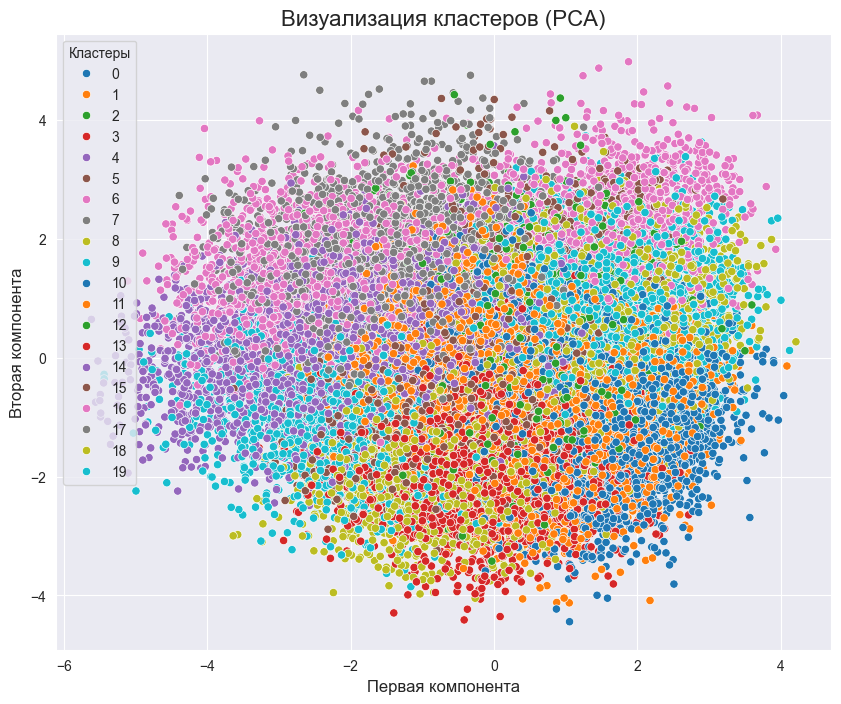

In [ ]:
# Визуализация кластеров с использованием PCA
visualize_clusters(embeddings, df, method="PCA")

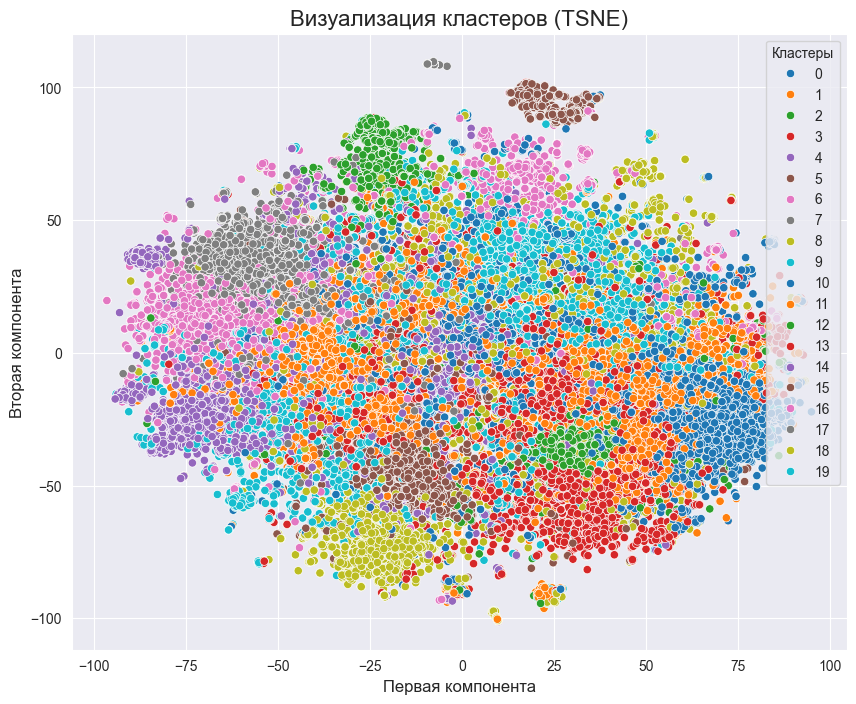

In [ ]:
# Визуализация кластеров с использованием t-SNE
visualize_clusters(embeddings, df, method="TSNE")

In [ ]:
# Рекомендация экспонатов по кластеру
def recommend_by_cluster(query, data, kmeans_model, n_recommendations=5):
    # Получаем целевую размерность из KMeans
    target_dim = kmeans_model.cluster_centers_.shape[1]

    # Получаем эмбеддинг запроса
    query_embedding = get_embeddings([query]).numpy()

    # Приводим эмбеддинг к нужной размерности
    query_embedding_resized = resize_embedding(query_embedding, target_dim)

    # Определяем кластер для запроса
    query_cluster = kmeans_model.predict(query_embedding_resized)

    # Рекомендуем экспонаты из того же кластера
    recommended_items = data[data['cluster'] == query_cluster[0]].head(n_recommendations)
    return recommended_items


In [ ]:
# Пример: Рекомендуем экспонаты для пользователя с запросом
user_query = "картина, изображающая пейзаж с озером"
recommended_items = recommend_by_cluster(user_query, df, kmeans_model)
recommended_items[['title', 'author', 'date_category']]

,title,author,date_category
1374,Закат.,Куинджи,1-я пол.20
1377,Миниатюра «Преподобный Корнилий Выговский»,,Неизвестно
1397,"Икона. Огненное восхождение пророка Илии, со с...",,Неизвестно
1400,Икона. Усекновение главы Иоанна Предтечи,,Неизвестно
1410,"Икона. Архангел Михаил, святые Кирик и Улита",,Неизвестно


## Рекомендательная система на основе KMeans + KNN

In [ ]:
def recommend_by_kmeans_knn(query, data, embeddings, kmeans_model, n_recommendations=5):
    # Получаем целевую размерность из KMeans
    target_dim = kmeans_model.cluster_centers_.shape[1]

    # Получаем эмбеддинг запроса
    query_embedding = get_embeddings([query]).numpy()

    # Приводим эмбеддинг к нужной размерности
    query_embedding_resized = resize_embedding(query_embedding, target_dim)

    # Определяем кластер для запроса
    query_cluster = kmeans_model.predict(query_embedding_resized)

    # Получаем индексы объектов в этом кластере
    cluster_indices = np.where(kmeans_model.labels_ == query_cluster)[0]

    # Если embeddings - разреженная матрица, конвертируем в плотный массив
    if isinstance(embeddings, np.ndarray):
        cluster_embeddings = embeddings[cluster_indices]
    else:
        cluster_embeddings = np.asarray(embeddings.todense()[cluster_indices])

    # Создаем модель NearestNeighbors
    nn_model = NearestNeighbors(n_neighbors=n_recommendations, metric='cosine')
    nn_model.fit(cluster_embeddings)

    # Находим ближайших соседей для запроса в этом кластере
    distances, indices = nn_model.kneighbors(query_embedding_resized)

    # Возвращаем рекомендованные объекты
    recommended_items = data.iloc[cluster_indices[indices.flatten()]]

    return recommended_items


In [ ]:
# Пример: Рекомендуем экспонаты для пользователя с запросом
user_query = "картина, изображающая пейзаж с озером"

# Рекомендуем экспонаты, используя модель KMeans и KNN
recommended_items = recommend_by_kmeans_knn(user_query, df, embeddings, kmeans_model)

# Выводим рекомендованные экспонаты с нужными колонками
recommended_items[['title', 'author', 'date_category']]

,title,author,date_category
1374,Закат.,Куинджи,1-я пол.20
30318,"Заготовка для подокладной иконы ""Христос Вседе...",,1-я пол.20
28205,"""Наши казаки в гостях у турецкого мушира""",,2-я пол.19
28206,"""Генерал лейтенант князь Василий Осипович Бебу...",,2-я пол.19
28207,"""Николай I""",,2-я пол.19


# Функции для чат-бота

In [2]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from transformers import BertTokenizer, BertModel
import torch
import os
import joblib  # Для загрузки k-means модели


In [3]:
file_model_2 = '/content/drive/MyDrive/data/Hackaton/Вариант 2/kmeans_model.joblib'
file_data_2 = '/content/drive/MyDrive/data/Hackaton/Вариант 2/data_for_database_final.parquet'

In [4]:
# === Загрузка модели KMeans ===

kmeans_model = joblib.load(file_model_2)

# === Загрузка модели RuBERT ===
model_name = 'DeepPavlov/rubert-base-cased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)
model.eval()  # Переключаем в режим инференса

# === Загрузка эмбеддингов из parquet ===
df = pd.read_parquet(file_data_2)
df["id"] = df.index

# Преобразуем эмбеддинги в numpy-массив
embeddings = np.vstack(df["embeddings"].apply(np.array))  # Если хранятся как списки


# === Функция для получения эмбеддингов запроса ===
def get_embeddings(query):
    inputs = tokenizer(query, padding=True, truncation=True, return_tensors="pt", max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
        embeddings = outputs.last_hidden_state.mean(dim=1)  # Усредняем по нужной размерности
    return embeddings.cpu().numpy()  # Переводим в numpy


# === Функция рекомендаций через KMeans + KNN ===
def recommend_by_kmeans_knn(query, embeddings, kmeans_model, n_recommendations=5):
    query_embedding = get_embeddings(query)  # Уже numpy
    query_cluster = kmeans_model.predict(query_embedding)[0]  # Получаем кластер
    cluster_indices = np.where(kmeans_model.labels_ == query_cluster)[0]  # Выбираем объекты из кластера

    cluster_embeddings = embeddings[cluster_indices]  # Берем их эмбеддинги

    # Создаем KNN-модель
    nn_model = NearestNeighbors(n_neighbors=n_recommendations, metric='cosine')
    nn_model.fit(cluster_embeddings)

    distances, indices = nn_model.kneighbors(query_embedding)

    recommended_indices = cluster_indices[indices.flatten()]  # Переводим в индексы исходного массива
    return recommended_indices


# === Функция получения экспонатов по индексам ===
def get_exhibits_by_indices(indices):
    return df.iloc[indices][["id", "title", "author", "date_category"]].to_dict(orient="records")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

In [6]:
# === Пример использования ===
# user_query = "Персик девочка стол окно цветы сирень"
user_query = "лунный,бухта,морской,луна,ночь,берег,набережнная"
recommended_indices = recommend_by_kmeans_knn(user_query, embeddings, kmeans_model)

# Получаем рекомендованные экспонаты
recommended_exhibits = get_exhibits_by_indices(recommended_indices)

for exhibit in recommended_exhibits:
    print(exhibit)

{'id': 32288, 'title': 'Вид города Одессы.', 'author': 'Айвазовский', 'date_category': '1-я пол.19'}
{'id': 14960, 'title': 'Морской пейзаж', 'author': 'Бурлюк', 'date_category': '1-я пол.20'}
{'id': 25960, 'title': 'Берег моря', 'author': 'Боткин', 'date_category': '2-я пол.19'}
{'id': 32301, 'title': 'Морской пролив с маяком.', 'author': 'Айвазовский', 'date_category': '1-я пол.19'}
{'id': 13401, 'title': 'На реке Мойке вечером', 'author': 'Платунов', 'date_category': '1-я пол.20'}
